# Defining the Question

### a) Specifying the Question

Analyse the IMDB dataset to advise Microsoft on the best types of films to create

### b) Defining the Metric for Success

Creating visualizations that can successfully inform the head of Microsoft's new movie studio on what type of films to create.

### c) Understanding the context

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.










### d) Recording the Experimental Design

1. Defining the Question
2. Data Preparation
    * Reading the Data
    * Checking the Data
3. Data Cleaning
4. Feature Engineering
5. Performing EDA
    * Univariate Analysis
    * Bivariate and Multivariate Analysis
6. Summary and Conclusion
7. Data Relevance

### e) Follow Up Questions

Here we will discuss the data relevance

# Importing our Libraries

In [1]:
# Let us first import all the libraries we will need for our analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

### Loading and Previewing our Datasets

In [ ]:
# Loading the Movie Gross Dataset from the source i.e. csv
gross = pd.read_csv('/content/bom.movie_gross.csv.gz')
gross.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [ ]:
# Loading the Title Basics Dataset from the source i.e. csv
basics = pd.read_csv('/content/imdb.title.basics.csv.gz')
basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [ ]:
# Loading the Title Ratings Dataset from the source i.e. csv
ratings = pd.read_csv('/content/imdb.title.ratings.csv.gz')
ratings.head()

tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21

## Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
print('This dataset has ' + str(gross.shape[0]) + ' rows, and ' + str(gross.shape[1]) + ' columns')
print('This dataset has ' + str(basics.shape[0]) + ' rows, and ' + str(basics.shape[1]) + ' columns')
print('This dataset has ' + str(ratings.shape[0]) + ' rows, and ' + str(ratings.shape[1]) + ' columns')

This dataset has 3387 rows, and 5 columns
This dataset has 146144 rows, and 6 columns
This dataset has 73856 rows, and 3 columns


In [ ]:
# Checking whether each column has an appropriate datatype

'''\n is an escape sequence that represents a newline character.
 it tells the program to move to the beginning of the next line before
 continuing to print'''

print("Data types for gross:")
print(gross.dtypes)
print("\nData types for df_title_basics:")
print(basics.dtypes)
print("\nData types for df_title_ratings:")
print(ratings.dtypes)

Data types for gross:
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

Data types for df_title_basics:
tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

Data types for df_title_ratings:
tconst            object
averagerating    float64
numvotes           int64
dtype: object


In [ ]:
# checking the dataset information

print("Data Info for gross:")
print(gross.info)
print("\nData Info for df_title_basics:")
print(basics.info)
print("\nData Info for df_title_ratings:")
print(ratings.info)

Data Info for gross:
<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       

In [ ]:
# checking the dataset information

print("Data Info for gross:")
print(gross.info)
print("\nData Info for df_title_basics:")
print(basics.info)
print("\nData Info for df_title_ratings:")
print(ratings.info)

Data Info for gross:
<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       

In [ ]:
# let us see the columns in our dataframe
print("These are the Columns in gross Dataset:")
print(gross.columns)
print("\nThese are the Columns in df_title_basics Dataset:")
print(basics.columns)
print("\nThese are the Columns in df_title_ratings Dataset:")
print(ratings.columns)

These are the Columns in gross Dataset:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

These are the Columns in df_title_basics Dataset:
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

These are the Columns in df_title_ratings Dataset:
Index(['tconst', 'averagerating', 'numvotes'], dtype='object')


In [ ]:
# Checking the entire profile of the dataframe

'''profile = ProfileReport(df, title="Dataset Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()
# let us save our profile report
profile.to_file(output_file="Dataset_Profile_Report.html")'''

'profile = ProfileReport(df, title="Dataset Profile Report", html={\'style\':{\'full_width\':True}})\nprofile.to_notebook_iframe()\n# let us save our profile report\nprofile.to_file(output_file="Dataset_Profile_Report.html")'

In [ ]:
# let us see the unique values of all our columns
# so that we can separate out the category and numeric features

for col in list(gross):
    print(col)
    print(gross[col].unique())

for col in list(basics):
    print(col)
    print(basics[col].unique())

for col in list(ratings):
    print(col)
    print(ratings[col].unique())

title
['Toy Story 3' 'Alice in Wonderland (2010)'
 'Harry Potter and the Deathly Hallows Part 1' ... 'El Pacto' 'The Swan'
 'An Actor Prepares']
studio
['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI' 'RTWC'
 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 'EOne' 'LD' 

# Data Cleaning

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
gross_copy = gross.copy(deep = True)
basics_copy = basics.copy(deep = True)
ratings_copy = ratings.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
gross_copy.columns = gross_copy.columns.str.lower()
basics_copy.columns = basics_copy.columns.str.lower()
ratings_copy.columns = ratings_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
# let us see the columns in our dataframe
print("These are the Columns in gross Dataset:")
print(gross_copy.columns)
print("\nThese are the Columns in df_title_basics Dataset:")
print(basics_copy.columns)
print("\nThese are the Columns in df_title_ratings Dataset:")
print(ratings_copy.columns)

These are the Columns in gross Dataset:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

These are the Columns in df_title_basics Dataset:
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

These are the Columns in df_title_ratings Dataset:
Index(['tconst', 'averagerating', 'numvotes'], dtype='object')


In [ ]:
# Let us check for duplicates
print(gross_copy.duplicated().sum())
print(basics_copy.duplicated().sum())
print(ratings_copy.duplicated().sum())

0
0
0


In [ ]:
# let us check for missing values in our dataframe
print("These are the null values in gross Dataset:")
print(gross_copy.isnull().sum())
print("\nThese are the null values in df_title_basics Dataset:")
print(basics_copy.isnull().sum())
print("\nThese are the null values in df_title_ratings Dataset:")
print(ratings_copy.isnull().sum())
print("\nThese are the null values in df_title_budgets Dataset:")

These are the null values in gross Dataset:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

These are the null values in df_title_basics Dataset:
tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

These are the null values in df_title_ratings Dataset:
tconst           0
averagerating    0
numvotes         0
dtype: int64

These are the null values in df_title_budgets Dataset:


In [ ]:
print("Rows with missing values in gross_copy:")
display(gross_copy[gross_copy.isnull().any(axis=1)])

print("\nRows with missing values in df_basics_copy:")
display(basics_copy[basics_copy.isnull().any(axis=1)])

print("\nRows with missing values in df_ratings_copy:")
display(ratings_copy[ratings_copy.isnull().any(axis=1)])

Rows with missing values in gross_copy:


title      studio  domestic_gross  \
210            Outside the Law (Hors-la-loi)         NaN         96900.0   
222                                  Flipped          WB       1800000.0   
230               It's a Wonderful Afterlife         UTV             NaN   
254   The Polar Express (IMAX re-issue 2010)          WB        673000.0   
267                           Tiny Furniture         IFC        392000.0   
...                                      ...         ...             ...   
3382                               The Quake       Magn.          6200.0   
3383             Edward II (2018 re-release)          FM          4800.0   
3384                                El Pacto        Sony          2500.0   
3385                                The Swan  Synergetic          2400.0   
3386                       An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
210        3300000  2010  
222            NaN  2010  
230        1300000  2010  
254            NaN  2010  
267            NaN  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[1380 rows x 5 columns]


Rows with missing values in df_basics_copy:


tconst                                      primary_title  \
3       tt0069204                                    Sabse Bada Sukh   
6       tt0112502                                            Bigfoot   
8       tt0139613                                         O Silêncio   
16      tt0187902  How Huang Fei-hong Rescued the Orphan from the...   
21      tt0250404                                          Godfather   
...           ...                                                ...   
146138  tt9916428                                The Secret of China   
146140  tt9916622        Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                                    Dankyavar Danka   
146142  tt9916730                                             6 Gunn   
146143  tt9916754                     Chico Albuquerque - Revelações   

                                           original_title  start_year  \
3                                         Sabse Bada Sukh        2018   
6                                                 Bigfoot        2017   
8                                              O Silêncio        2012   
16      How Huang Fei-hong Rescued the Orphan from the...        2011   
21                                              Godfather        2012   
...                                                   ...         ...   
146138                                The Secret of China        2019   
146140        Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                                    Dankyavar Danka        2013   
146142                                             6 Gunn        2017   
146143                     Chico Albuquerque - Revelações        2013   

        runtime_minutes                 genres  
3                   NaN           Comedy,Drama  
6                   NaN        Horror,Thriller  
8                   NaN    Documentary,History  
16                  NaN                    NaN  
21                  NaN            Crime,Drama  
...                 ...                    ...  
146138              NaN  Adventure,History,War  
146140              NaN            Documentary  
146141              NaN                 Comedy  
146142            116.0                    NaN  
146143              NaN            Documentary  

[33912 rows x 6 columns]


Rows with missing values in df_ratings_copy:


Empty DataFrame
Columns: [tconst, averagerating, numvotes]
Index: []

In [ ]:
# Let us clean the datasets based on their data types
# Clean the 'foreign_gross' column in gross_copy

# Remove commas and convert to numeric
gross_copy['foreign_gross'] = gross_copy['foreign_gross'].str.replace(',', '', regex=False)
gross_copy['foreign_gross'] = pd.to_numeric(gross_copy['foreign_gross'])

# Handle missing value in primary_title by dropping the row
basics_copy.dropna(subset=['primary_title'], inplace=True)

# Impute missing values
# For categorical/object columns, impute with a placeholder 'Unknown'
gross_copy['studio'].fillna('Unknown', inplace=True)
basics_copy['original_title'].fillna('Unknown', inplace=True)
basics_copy['genres'].fillna('Unknown', inplace=True)

# For numerical columns, impute with the median
gross_copy['domestic_gross'].fillna(gross_copy['domestic_gross'].median(), inplace=True)
gross_copy['foreign_gross'].fillna(gross_copy['foreign_gross'].median(), inplace=True)
basics_copy['runtime_minutes'].fillna(basics_copy['runtime_minutes'].median(), inplace=True)

# Verify that missing values have been handled
print("Missing values after handling in gross_copy:")
print(gross_copy.isnull().sum())
print("\nMissing values after handling in basics_copy:")
print(basics_copy.isnull().sum())
print("\nMissing values after handling in ratings_copy:")
print(ratings_copy.isnull().sum())

Missing values after handling in gross_copy:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Missing values after handling in basics_copy:
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Missing values after handling in ratings_copy:
tconst           0
averagerating    0
numvotes         0
dtype: int64


# Feature Engineering

In [ ]:
#Merge datasets
merged_basics_ratings = pd.merge(basics_copy, ratings_copy, on='tconst', how='inner')
merged_basics_ratings.head()

#rename the title column in gross data to primary_title so we can merge this dataset too
gross_copy.rename(columns={'title': 'primary_title'}, inplace=True)

#merge basics_ratings to gross dataframe
merged = pd.merge(gross_copy, merged_basics_ratings, on='primary_title', how='inner')

print("Merged DataFrame with Gross Information:")
display(merged.head())


Merged DataFrame with Gross Information:


primary_title studio  domestic_gross  foreign_gross  year  \
0                 Toy Story 3     BV     415000000.0    652000000.0  2010   
1                   Inception     WB     292600000.0    535700000.0  2010   
2         Shrek Forever After   P/DW     238700000.0    513900000.0  2010   
3  The Twilight Saga: Eclipse   Sum.     300500000.0    398000000.0  2010   
4                  Iron Man 2   Par.     312400000.0    311500000.0  2010   

      tconst              original_title  start_year  runtime_minutes  \
0  tt0435761                 Toy Story 3        2010            103.0   
1  tt1375666                   Inception        2010            148.0   
2  tt0892791         Shrek Forever After        2010             93.0   
3  tt1325004  The Twilight Saga: Eclipse        2010            124.0   
4  tt1228705                  Iron Man 2        2010            124.0   

                       genres  averagerating  numvotes  
0  Adventure,Animation,Comedy            8.3    682218  
1     Action,Adventure,Sci-Fi            8.8   1841066  
2  Adventure,Animation,Comedy            6.3    167532  
3     Adventure,Drama,Fantasy            5.0    211733  
4     Action,Adventure,Sci-Fi            7.0    657690

In [ ]:
# Determining the no. of records in our merged dataset

print('This dataset has ' + str(merged.shape[0]) + ' rows, and ' + str(merged.shape[1]) + ' columns')

This dataset has 3027 rows, and 12 columns


In [ ]:
#check for duplicates in the merged dataframe
merged.duplicated().sum()

np.int64(0)

In [ ]:
# let us check for missng values in merged dataframe
print("These are the null values in gross Dataset:")
print(merged.isnull().sum())

These are the null values in gross Dataset:
primary_title      0
studio             0
domestic_gross     0
foreign_gross      0
year               0
tconst             0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


In [ ]:
merged["genres"] = merged["genres"].str.split(",")
merged = merged.explode("genres")
merged.head()

primary_title studio  domestic_gross  foreign_gross  year     tconst  \
0   Toy Story 3     BV     415000000.0    652000000.0  2010  tt0435761   
0   Toy Story 3     BV     415000000.0    652000000.0  2010  tt0435761   
0   Toy Story 3     BV     415000000.0    652000000.0  2010  tt0435761   
1     Inception     WB     292600000.0    535700000.0  2010  tt1375666   
1     Inception     WB     292600000.0    535700000.0  2010  tt1375666   

  original_title  start_year  runtime_minutes     genres  averagerating  \
0    Toy Story 3        2010            103.0  Adventure            8.3   
0    Toy Story 3        2010            103.0  Animation            8.3   
0    Toy Story 3        2010            103.0     Comedy            8.3   
1      Inception        2010            148.0     Action            8.8   
1      Inception        2010            148.0  Adventure            8.8   

   numvotes  
0    682218  
0    682218  
0    682218  
1   1841066  
1   1841066

In [ ]:
# Let us relocate the tconst column to be the first
# removes the 'tconst' column from its current position in the merged DataFrame
# and stores its content in a variable called tconst_column.
# pop() removes the column in place and returns the removed column.

tconst_column = merged.pop('tconst')
merged.insert(0, 'tconst', tconst_column) # insert the 'tconst' column back into the merged DataFrame.

# Display the first few rows to confirm the change
print("DataFrame with 'tconst' column moved to the front:")
display(merged.head())

DataFrame with 'tconst' column moved to the front:


tconst primary_title studio  domestic_gross  foreign_gross  year  \
0  tt0435761   Toy Story 3     BV     415000000.0    652000000.0  2010   
0  tt0435761   Toy Story 3     BV     415000000.0    652000000.0  2010   
0  tt0435761   Toy Story 3     BV     415000000.0    652000000.0  2010   
1  tt1375666     Inception     WB     292600000.0    535700000.0  2010   
1  tt1375666     Inception     WB     292600000.0    535700000.0  2010   

  original_title  start_year  runtime_minutes     genres  averagerating  \
0    Toy Story 3        2010            103.0  Adventure            8.3   
0    Toy Story 3        2010            103.0  Animation            8.3   
0    Toy Story 3        2010            103.0     Comedy            8.3   
1      Inception        2010            148.0     Action            8.8   
1      Inception        2010            148.0  Adventure            8.8   

   numvotes  
0    682218  
0    682218  
0    682218  
1   1841066  
1   1841066

In [ ]:
# Let us create a new column in the merged dataset called total_gross
merged['total_gross'] = merged['domestic_gross'] + merged['foreign_gross']

# Display the first few rows to confirm the new column
print("DataFrame with 'total_gross' column added:")
display(merged.head())

DataFrame with 'total_gross' column added:


tconst primary_title studio  domestic_gross  foreign_gross  year  \
0  tt0435761   Toy Story 3     BV     415000000.0    652000000.0  2010   
0  tt0435761   Toy Story 3     BV     415000000.0    652000000.0  2010   
0  tt0435761   Toy Story 3     BV     415000000.0    652000000.0  2010   
1  tt1375666     Inception     WB     292600000.0    535700000.0  2010   
1  tt1375666     Inception     WB     292600000.0    535700000.0  2010   

  original_title  start_year  runtime_minutes     genres  averagerating  \
0    Toy Story 3        2010            103.0  Adventure            8.3   
0    Toy Story 3        2010            103.0  Animation            8.3   
0    Toy Story 3        2010            103.0     Comedy            8.3   
1      Inception        2010            148.0     Action            8.8   
1      Inception        2010            148.0  Adventure            8.8   

   numvotes   total_gross  
0    682218  1.067000e+09  
0    682218  1.067000e+09  
0    682218  1.067000e+09  
1   1841066  8.283000e+08  
1   1841066  8.283000e+08

# EDA

### Univariate Analysis

In [ ]:
# finding the information about the variables
# This should likely be run on the copied dataframes
print("Info for gross_copy:")
gross_copy.info()
print("\nInfo for df_basics_copy:")
basics_copy.info()
print("\nInfo for df_ratings_copy:")
ratings_copy.info()

Info for gross_copy:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB

Info for df_basics_copy:
<class 'pandas.core.frame.DataFrame'>
Index: 146143 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146143 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146143 non-null  object 
 3   start_year       146143 non-null  int64  
 4   runtime_minutes  146143 non-null  float64
 5   genres           146143 non-n

<Axes: xlabel='averagerating', ylabel='Density'>

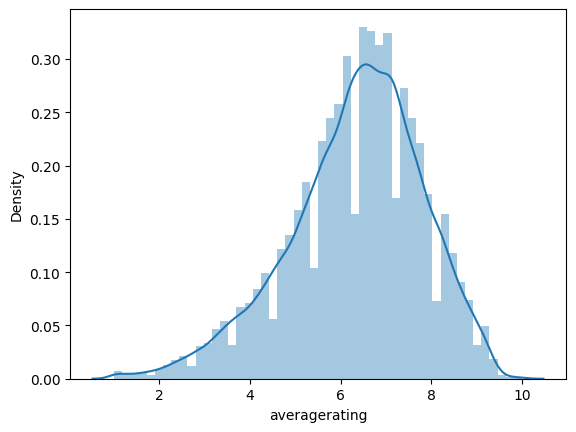

In [ ]:
# Let us plot a histogram of the averagerating from the Ratinga Dataframe

sns.distplot(ratings_copy['averagerating'], kde=True)

# kde=True tells the function to include a Kernel Density Estimate (KDE) curve on the plot,
# which provides a smoothed representation of the distribution.


from this histogram, we can see that the ratings range from 0-10
The distribution appears to be roughly bell-shaped, but skewed to the left.
Meaning there are more movies with ratings clustered towards the higher end of the scale than the lower end.
The average ratings in this dataset are generally concentrated on the higher side,
with a peak around 6-7, and fewer movies receiving very low or very high ratings.


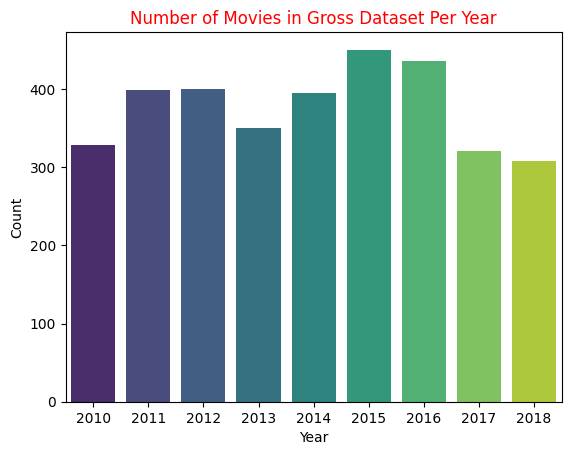

In [ ]:
# Plotting a bar plot of the year column in the 'year' column in the gross dataset

# we use seaborn to create a bar chart
sns.countplot(x='year', data=gross_copy, palette='viridis') # Added palette for different colors

# Labelling our x axis
plt.xlabel("Year")

# Labelling our y axis
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Number of Movies in Gross Dataset Per Year", color='red')

# Displaying our chart
plt.show()



From the BAr graph above, the number of movies in this dataset generally increased from 2010 to 2015.
The year 2015 appears to have the highest number of movies in this dataset.
After 2015, there seems to be a slight decrease in the number of movies in this dataset towards 2018'''

Univariate analysis for runtime_minutes in basics_copy:


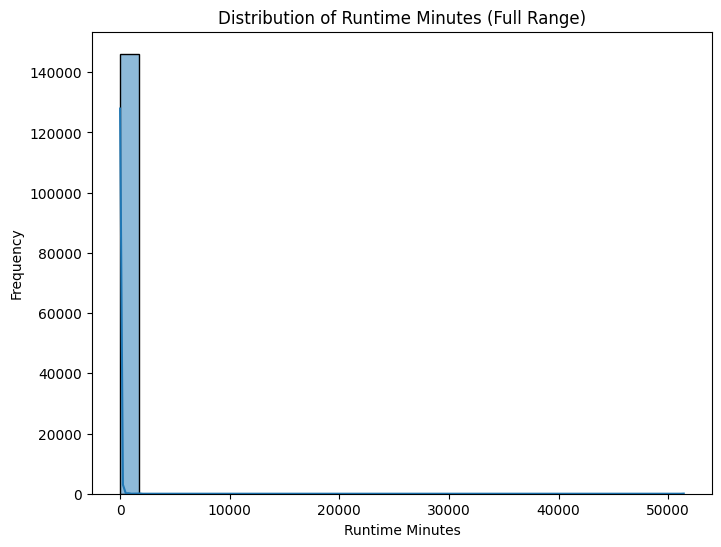

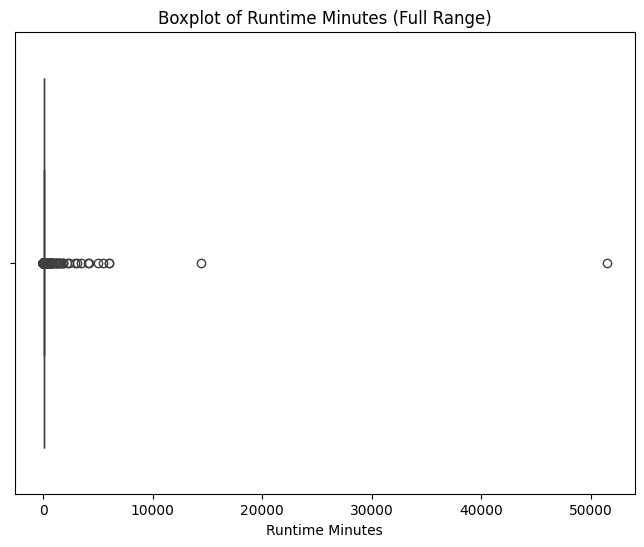

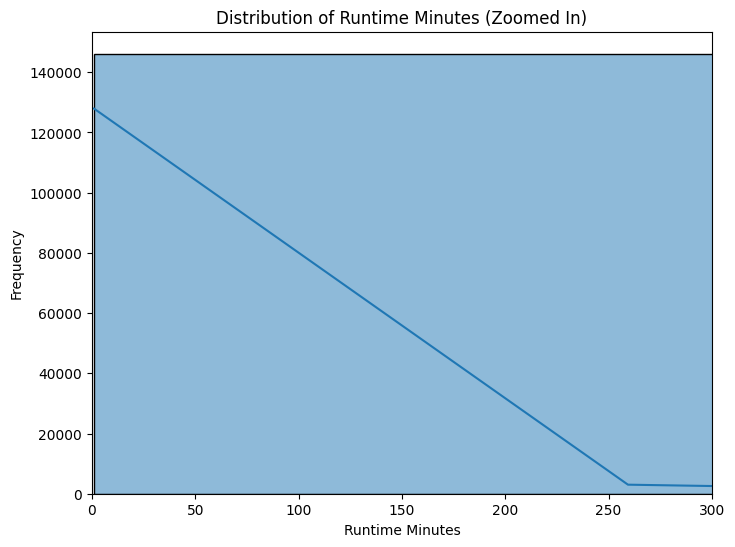

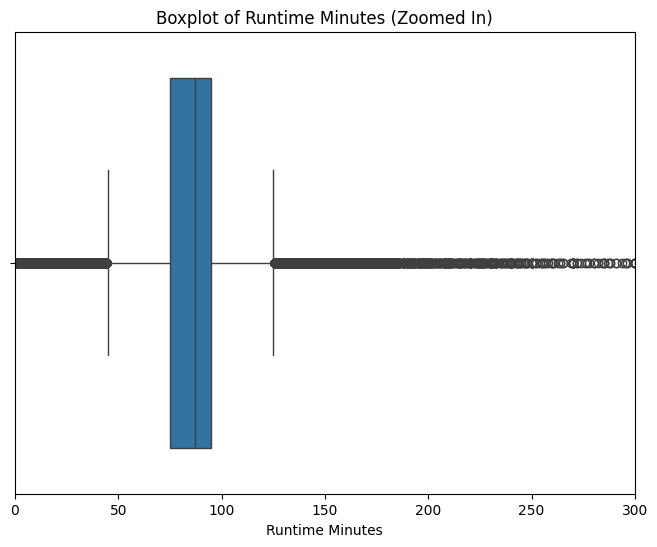


Summary statistics for runtime_minutes:


count    146143.000000
mean         86.363753
std         147.192154
min           1.000000
25%          75.000000
50%          87.000000
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [ ]:
# Univariate analysis on the 'runtime_minutes' column in the basics_copy DataFrame
print("Univariate analysis for runtime_minutes in basics_copy:")

# Histogram for runtime_minutes
plt.figure(figsize=(8, 6))
sns.histplot(basics_copy['runtime_minutes'], bins=30, kde=True)
plt.title('Distribution of Runtime Minutes (Full Range)')
plt.xlabel('Runtime Minutes')
plt.ylabel('Frequency')
plt.show()

# Boxplot for runtime_minutes to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=basics_copy['runtime_minutes'])
plt.title('Boxplot of Runtime Minutes (Full Range)')
plt.xlabel('Runtime Minutes')
plt.show()

# Zoomed-in Histogram for runtime_minutes (excluding extreme outliers)
plt.figure(figsize=(8, 6))
sns.histplot(basics_copy['runtime_minutes'], bins=30, kde=True)
plt.title('Distribution of Runtime Minutes (Zoomed In)')
plt.xlabel('Runtime Minutes')
plt.ylabel('Frequency')
plt.xlim(0, 300) # Setting x-axis limit to focus on typical runtimes
plt.show()

# Zoomed-in Boxplot for runtime_minutes (excluding extreme outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(x=basics_copy['runtime_minutes'])
plt.title('Boxplot of Runtime Minutes (Zoomed In)')
plt.xlabel('Runtime Minutes')
plt.xlim(0, 300) # Setting x-axis limit to focus on typical runtimes
plt.show()


# Summary statistics for runtime_minutes
print("\nSummary statistics for runtime_minutes:")
display(basics_copy['runtime_minutes'].describe())

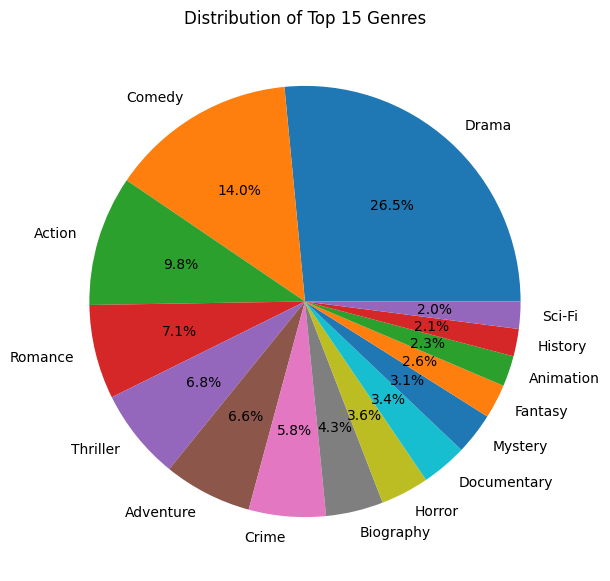

In [ ]:
# Create a pie chart o visualize which movie genres are most prevalent in your merged dataset

# Calculate the frequency of each genre
genre_counts = merged['genres'].value_counts()

# Plot the pie chart - limiting to top N genres for better visualization
# limit the pie chart to only show the top 15 most frequent genres, making the chart more readable
top_n_genres = 15
genre_counts.head(top_n_genres).plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title(f'Distribution of Top {top_n_genres} Genres')
plt.ylabel('') # Remove the default 'genres' label on the y-axis
plt.show()


Based on this piechart, we can see that drama, comedy and action are the most prevalent genres in this dataset.
however, to make these findings actionable for Microsoft,
we'd need to investigate if the prevalence of a genre correlates with its success.
To do this we need to perform bivariate and multivariate analysis

### Bivariate and Multivariate Analysis

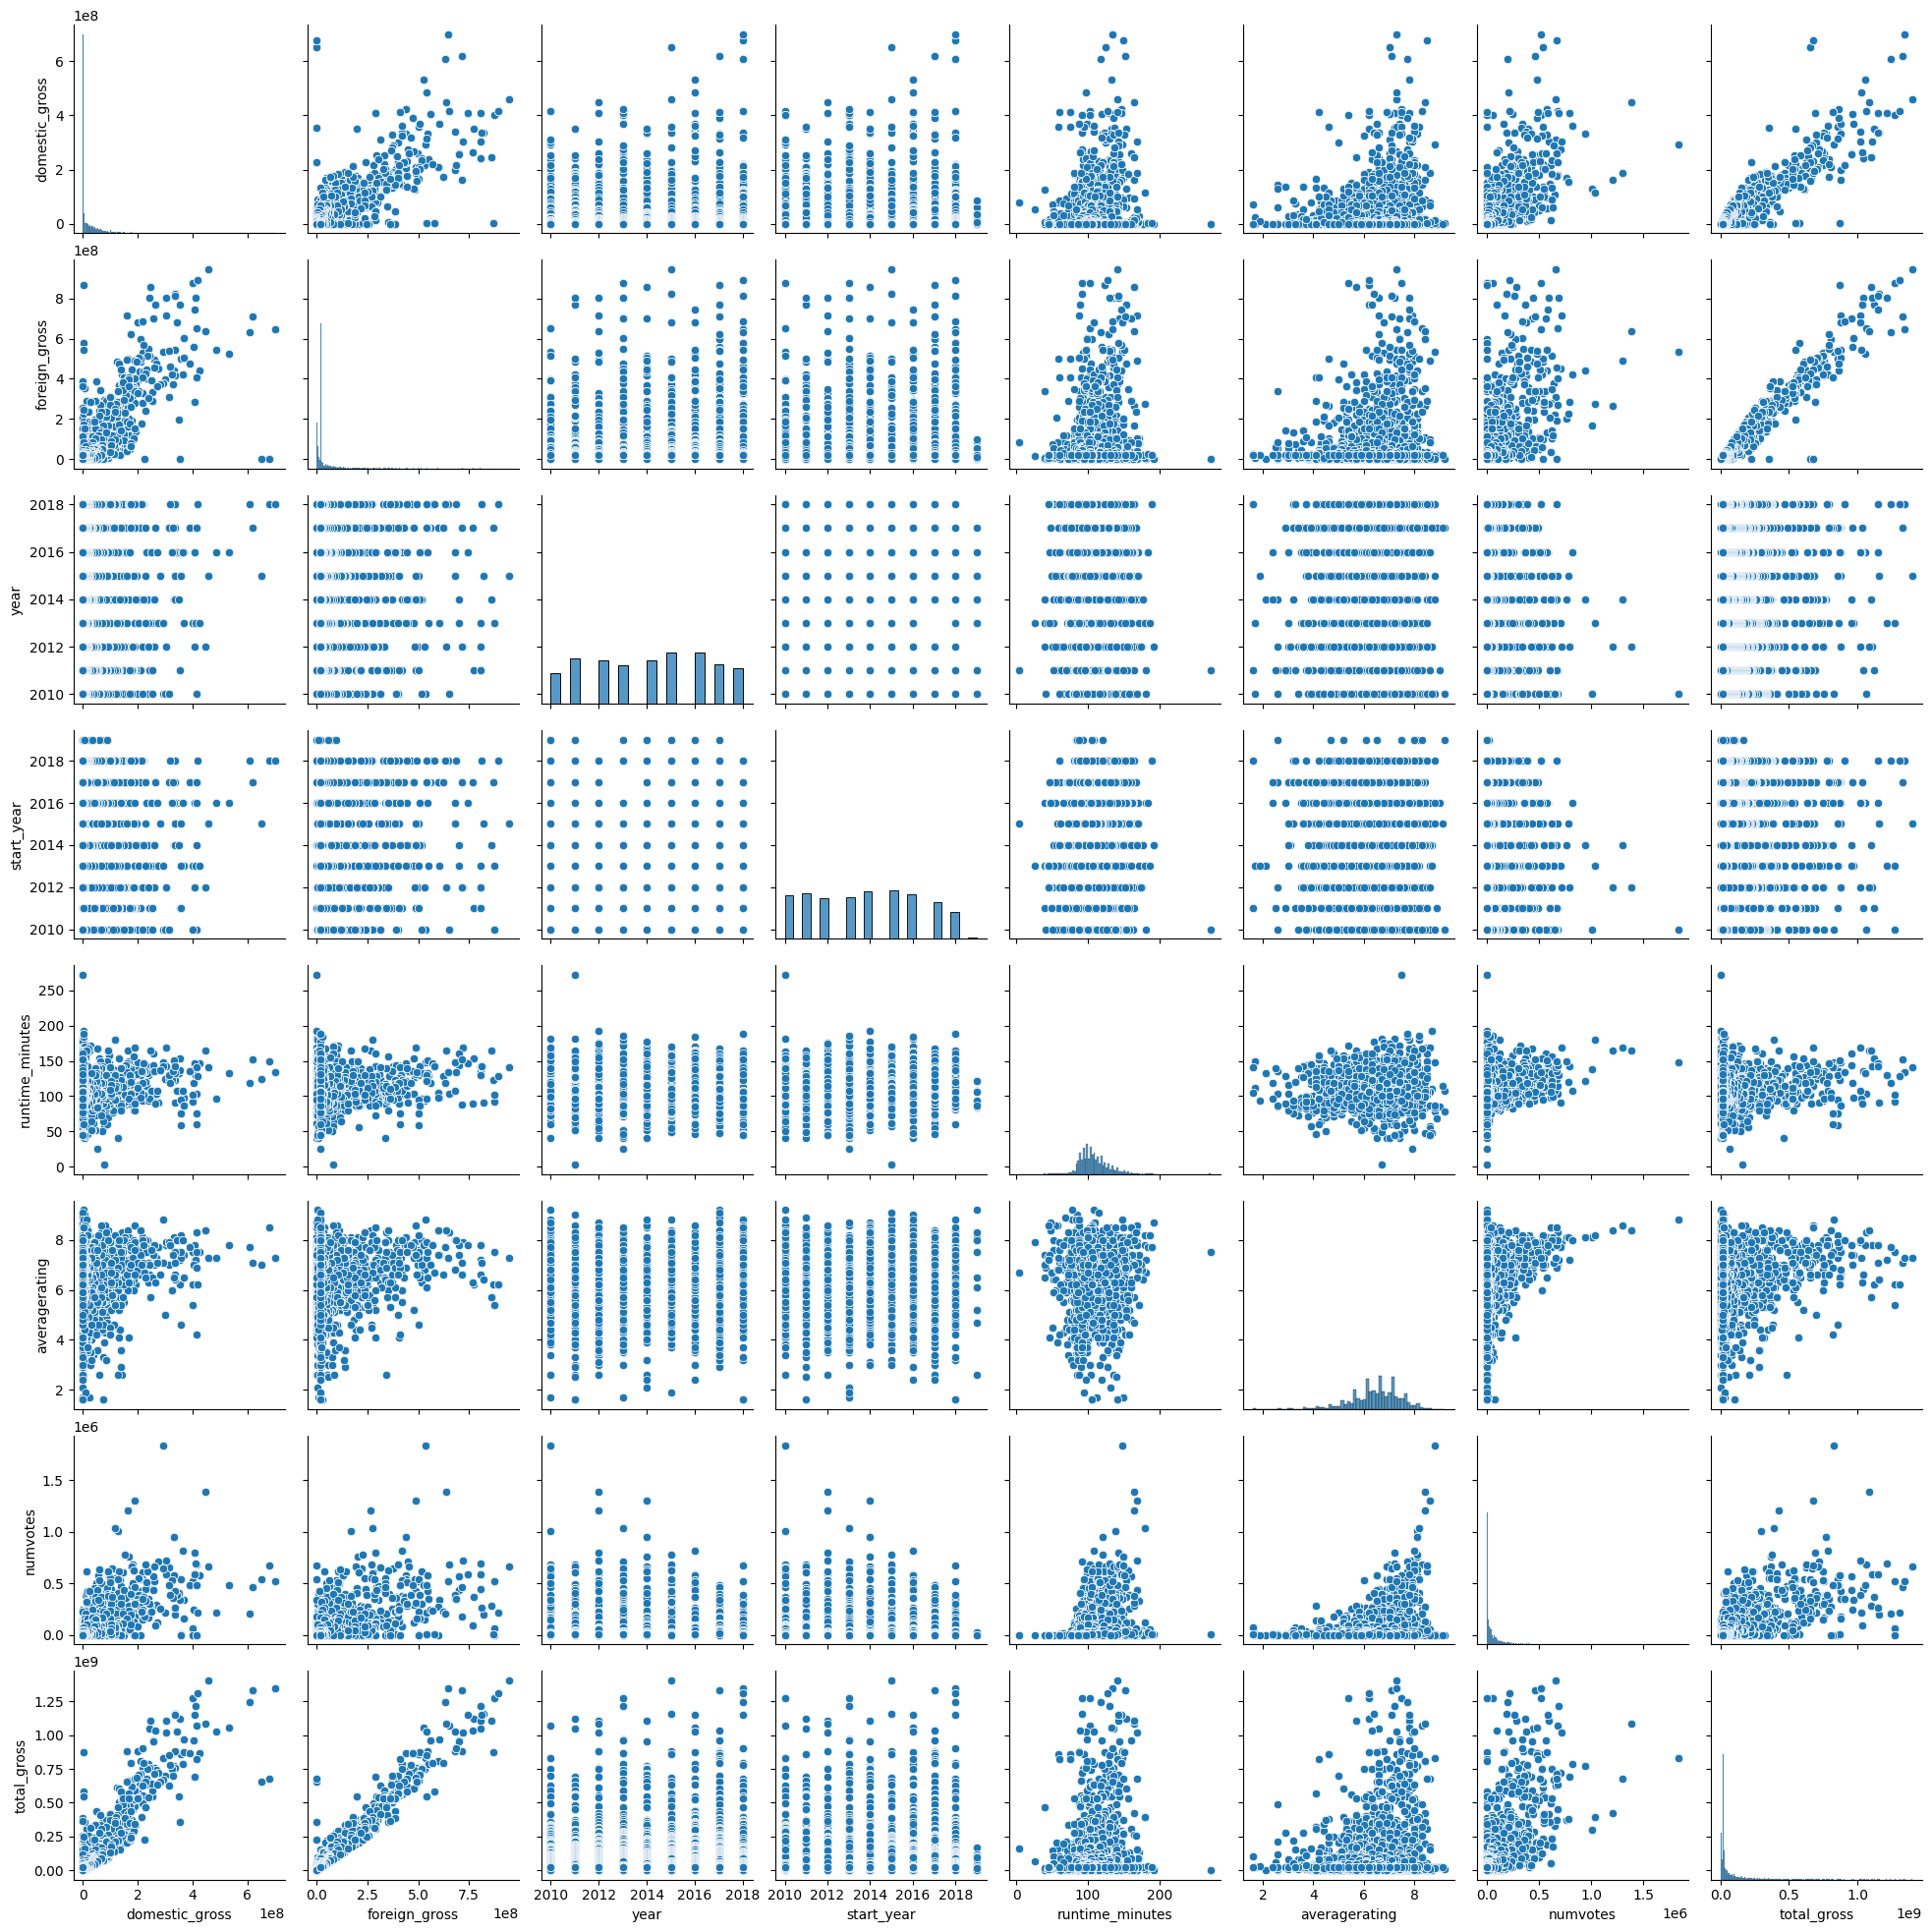

In [ ]:
# Ploting the bivariate summaries and recording our observations
# Reset the index to handle duplicate labels after exploding genres
merged_reset_index = merged.reset_index(drop=True)

sns.pairplot(merged_reset_index)
plt.show()

Let us create a heatmap to better understand the positive or negative relationship of the numerical columns displayed in the pairplot

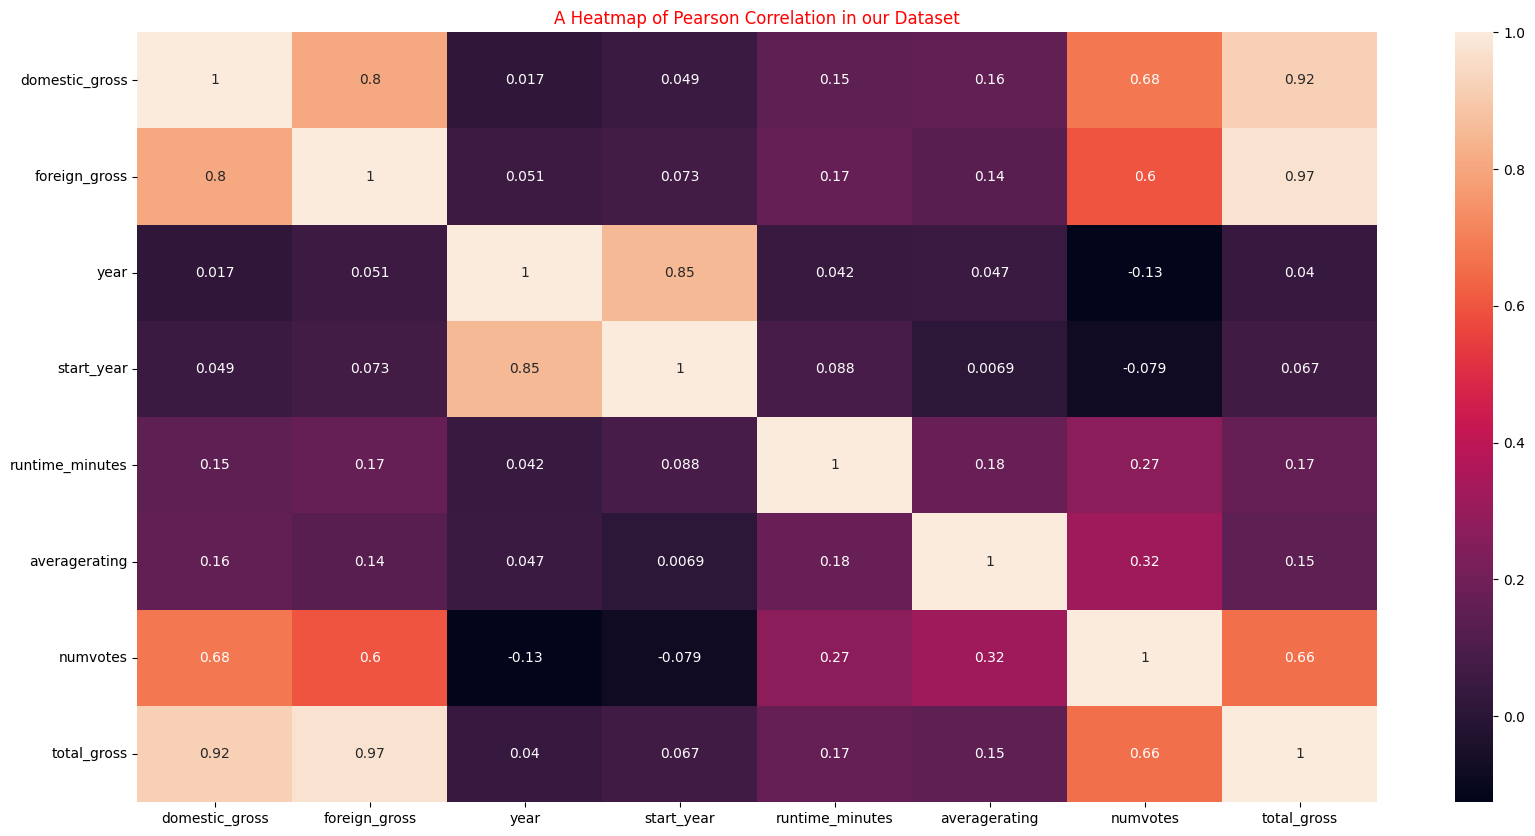

In [ ]:
# Calculating the pearson coefficient
# Select only numerical columns for correlation calculation
numerical_merged = merged.select_dtypes(include=np.number)

a = numerical_merged.corr()
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns,annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()


Based on the heatmap of Pearson correlation coefficients, we can draw the following observations about the relationships between the numerical variables in the merged dataset:

As expected, there are very strong positive correlations between domestic_gross, foreign_gross, and total_gross. Meaning that movies that perform well domestically also tend to perform well internationally, and both contribute significantly to the total gross. The correlation between domestic_gross and total_gross and foreign_gross and total_gross are very close to 1, which is expected since total gross is the sum of the other two.
The correlation between domestic_gross and foreign_gross is also high (around 0.80), indicating a strong relationship between a movie's performance in the domestic market and its performance in the foreign market.

Numvotes shows a moderate positive correlation with domestic_gross (around 0.68), foreign_gross (around 0.60), and total_gross (around 0.66). This suggests that movies with more votes (indicating higher popularity or wider reach) tend to have higher gross revenues, although the relationship is not as strong as the correlation between domestic and foreign gross.

averagerating has a weak to moderate positive correlation with domestic_gross (around 0.16), foreign_gross (around 0.14), and total_gross (around 0.15). This indicates that while there is a tendency for movies with higher average ratings to have higher gross revenues, the relationship is not very strong. A critically acclaimed movie isn't guaranteed to be a box office hit, and vice versa. averagerating has a slightly stronger positive correlation with numvotes (around 0.32), suggesting that movies with higher ratings tend to receive more votes, which makes sense.

Runtime_minutes shows a weak positive correlation with gross revenues (domestic_gross around 0.15, foreign_gross around 0.17, total_gross around 0.17), average rating (around 0.18), and number of votes (around 0.27). This suggests that while slightly longer movies might tend to have slightly higher gross, ratings, and votes, runtime is not a strong predictor of these metrics on its own.

year and start_year show very weak correlations with gross revenues, ratings, and votes. This suggests that the year of release within this timeframe (2010-2018) doesn't have a strong linear relationship with how much a movie grosses or how it's rated and voted on, based on this dataset.

There is a strong positive correlation between year and start_year (around 0.85), which is expected as they both represent the release year, although they come from different datasets.


Let us explore these positive correlations as well as the relationships between numerical columns and non numerical columns to draw viable conclusions

Median Gross Revenue per Genre:


domestic_gross  foreign_gross  total_gross
genres                                                 
Adventure        47400000.0     92200000.0  148700000.0
Sci-Fi           50300000.0     74600000.0  137000000.0
Animation        45750000.0     78650000.0  119400000.0
Unknown          56500000.0     44700000.0  101200000.0
Action           14650000.0     26700000.0   53500000.0
Fantasy          15650000.0     18700000.0   45550000.0
Family           23200000.0     18700000.0   45300000.0
Sport             7200000.0     18700000.0   24000000.0
Horror            8500000.0     18700000.0   23300000.0
Comedy            3800000.0     18700000.0   22100000.0
Thriller          3300000.0     18700000.0   20500000.0
Biography         2400000.0     18700000.0   19900000.0
Crime             2550000.0     18700000.0   19750000.0
Musical           1327500.0     18700000.0   19692000.0
Mystery           2700000.0     18700000.0   19500000.0
History           1300000.0     18700000.0   19378000.0
Romance           1100000.0     18700000.0   19153500.0
Music             1900000.0     18700000.0   19133500.0
Drama             1100000.0     18700000.0   18981000.0
Western           1400000.0     18700000.0   18929000.0
Documentary        507000.0     18700000.0   18850000.0
War                316000.0     18700000.0   18845000.0
News               114100.0     18700000.0   18814100.0

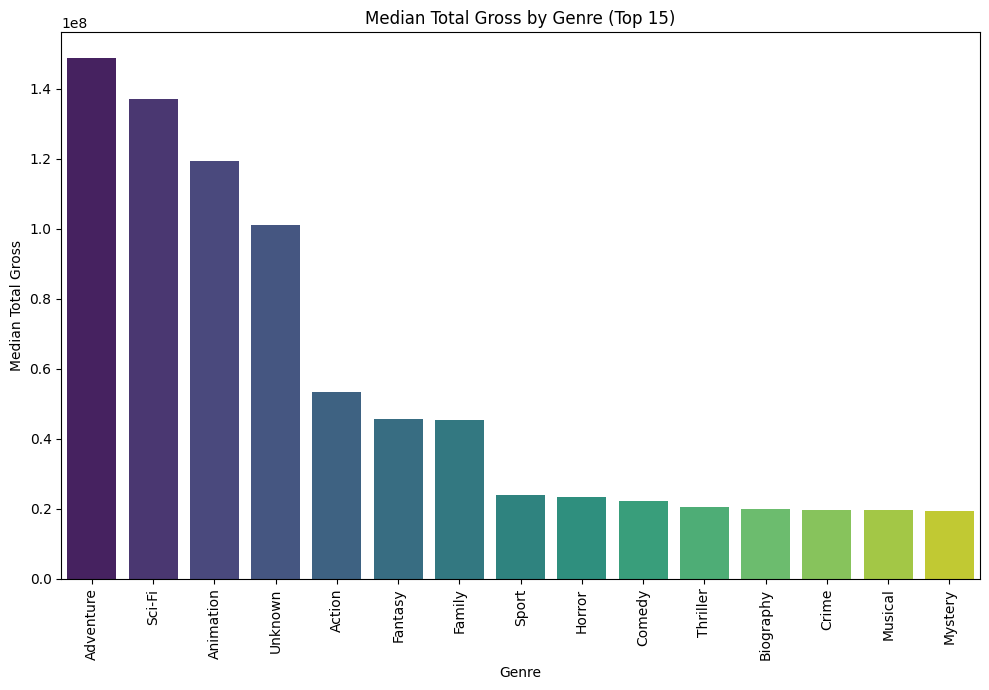

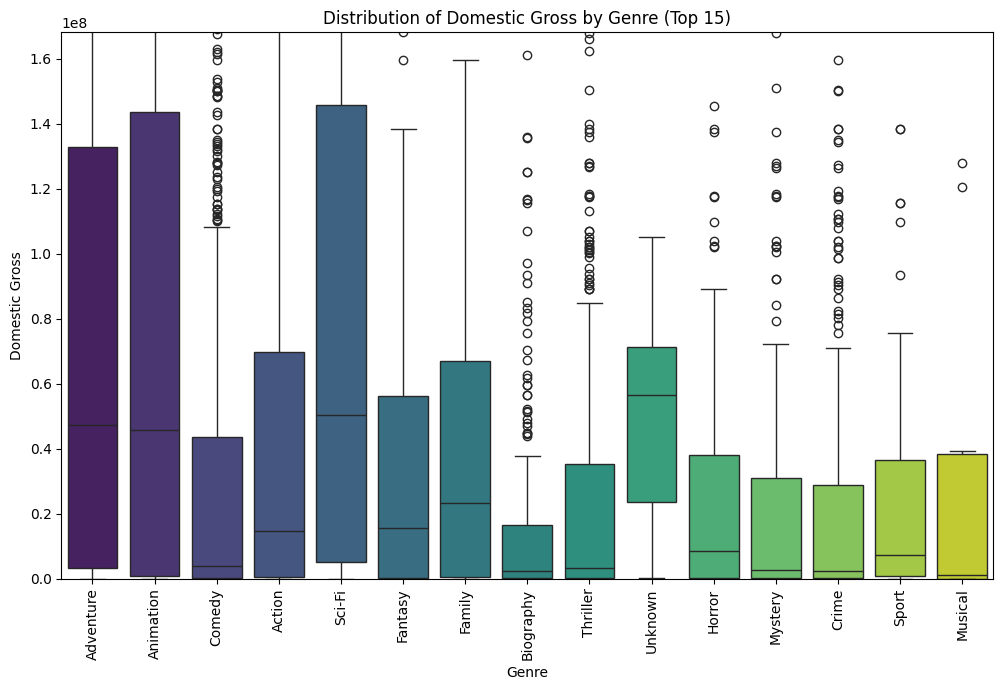

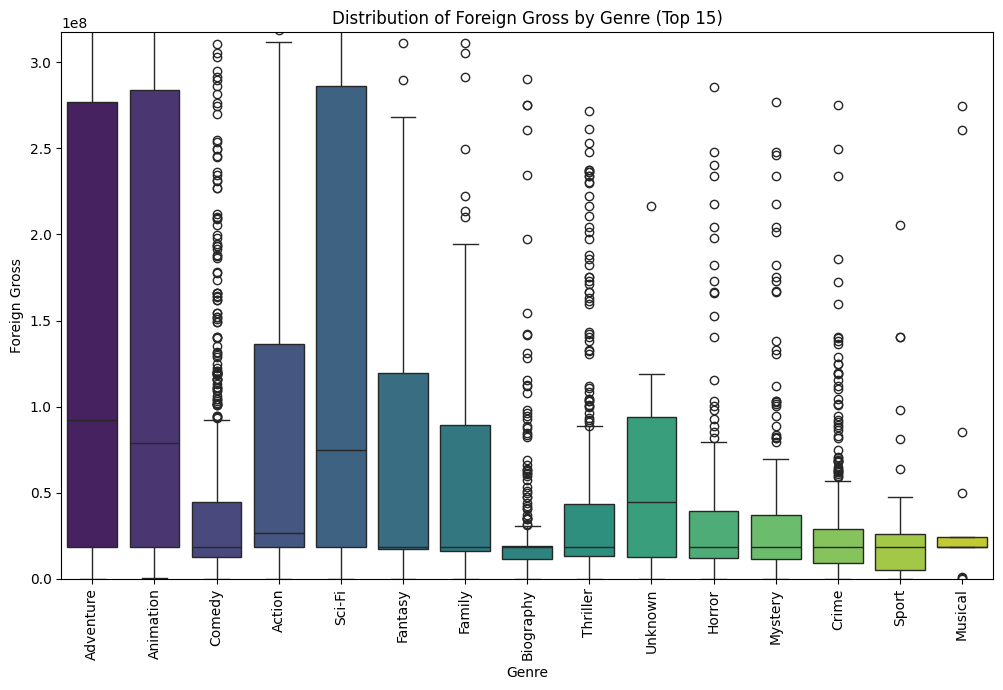

In [ ]:
# Bivariate Analysis: Genre vs. Gross Revenue

# Group by genre and calculate median gross revenues (using median due to skewed data)
genre_gross = merged.groupby('genres')[['domestic_gross', 'foreign_gross', 'total_gross']].median().sort_values(by='total_gross', ascending=False)

# Display the median gross revenues per genre
print("Median Gross Revenue per Genre:")
display(genre_gross)

# Visualize the relationship between Genre and Total Gross using a bar plot of top genres
plt.figure(figsize=(10, 7)) #creates a new figure for the plot with a specified size.
top_genres_by_gross = genre_gross.head(15) # Select top 15 genres by median total gross
sns.barplot(x=top_genres_by_gross.index, y=top_genres_by_gross['total_gross'], palette='viridis')
plt.title('Median Total Gross by Genre (Top 15)') #lable the title
plt.xlabel('Genre') #label the x axis
plt.ylabel('Median Total Gross') #label the y axis
plt.xticks(rotation=90) #rotates the x-axis labels vertically so they don't overlap.
plt.tight_layout() #adjust the plo parameters for a tight layout
plt.show()
# Visualize the distribution of Domestic Gross by Genre for top genres using box plot
plt.figure(figsize=(10, 7))
sns.boxplot(x='genres', y='domestic_gross', data=merged[merged['genres'].isin(top_genres_by_gross.index)], palette='viridis')
plt.title('Distribution of Domestic Gross by Genre (Top 15)')
plt.xlabel('Genre')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, merged['domestic_gross'].quantile(0.95)) # Limit y-axis to see distribution better
plt.show()

# Visualize the distribution of Foreign Gross by Genre for top genres using box plot
plt.figure(figsize=(10, 7))
sns.boxplot(x='genres', y='foreign_gross', data=merged[merged['genres'].isin(top_genres_by_gross.index)], palette='viridis')
plt.title('Distribution of Foreign Gross by Genre (Top 15)')
plt.xlabel('Genre')
plt.ylabel('Foreign Gross')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, merged['foreign_gross'].quantile(0.95)) # Limit y-axis to see distribution better
plt.show()

Based on the bar graph showing the Median Total Gross by Genre (Top 15) from the output of above, we can draw the following observations:

The bar graph clearly shows which genres have the highest median total gross. The genres with the tallest bars are, on average (median), the most financially successful in this dataset. Based on the plot generated, Adventure, Sci-Fi, and Animation appear to be among the genres with the highest median total gross.

For Microsoft's new movie studio, this bar graph highlights genres that have a historical track record of generating high median total revenue. These could be good starting points for considering what types of films to produce.

It's important to remember that this bar graph shows the median total gross. The box plots below the bar graph provide additional context by showing the distribution of domestic and foreign gross within each genre. This helps to understand the variability and potential outliers within each genre's performance. For example, a genre might have a high median but also a wide range of gross revenues, indicating more variability in success.

These box plots provide a more detailed view of the distribution of gross revenue within each of the top 15 genres, going beyond just the median.

Here's what we can interpret from these box plots:

Median (the line inside the box): This line represents the median domestic or foreign gross for that genre. It's the same median value we saw in the bar graph, but here it's placed within the context of the full distribution.
he Box: Shows where the middle half of movies in that genre fall in terms of earnings. A short box means most movies in that genre earn pretty similar amounts. A tall box means there's a bigger difference between how much movies earn in that genre.
The Line in the Middle of the Box: This is the median earning – the middle value when you line up all the movies in that genre by how much they made.
The Dots Outside the Lines are Outliers (the individual points beyond the whiskers): These points represent movies within that genre that have unusually high (or sometimes low) domestic or foreign gross compared to the rest of the movies in that genre. These outliers often represent highly successful blockbuster films that can significantly skew the average gross.

By examining these box plots for each genre, we can draw the following conclusions:

Consistency vs. Big Hits: Some genres are more consistent earners (small boxes, few dots far away). Genres with many outliers at the high end indicate that while the median movie might not be the highest-grossing, the genre has the potential for producing extremely high-earning films. This is particularly relevant for a new studio aiming for box office success.

Comparing the domestic and foreign gross box plots for the same genre can reveal if a genre tends to perform better in one market than the other, or if the variability is different between markets. For example, a genre might have a moderate median domestic gross but a higher median foreign gross and more foreign outliers, suggesting it has stronger international appeal.

For Microsoft, these box plots provide crucial context to the median values from the bar graph. They help differentiate between genres that are consistently solid performers (higher median, lower variability) and genres that have a high potential for huge hits but also more risk (lower median, higher variability, more outliers).




Median Rating and Number of Votes per Genre (sorted by Average Rating):


averagerating  numvotes
genres                              
Documentary           7.30    1167.0
War                   7.10    7279.0
Biography             7.00   16593.0
History               7.00   10298.5
Sport                 7.00   21946.0
News                  6.85      26.0
Animation             6.85   33582.0
Music                 6.80    9910.5
Drama                 6.70   11390.0
Western               6.60   10439.0
Musical               6.55    4227.5
Sci-Fi                6.50  153962.0
Crime                 6.50   30889.5
Adventure             6.50   74085.0
Action                6.40   46145.0
Family                6.40   16086.0
Romance               6.40   13786.5
Mystery               6.40   31089.0
Comedy                6.30   21700.5
Thriller              6.30   23912.0
Fantasy               6.30   49714.5
Unknown               6.10      14.0
Horror                5.75   30512.5

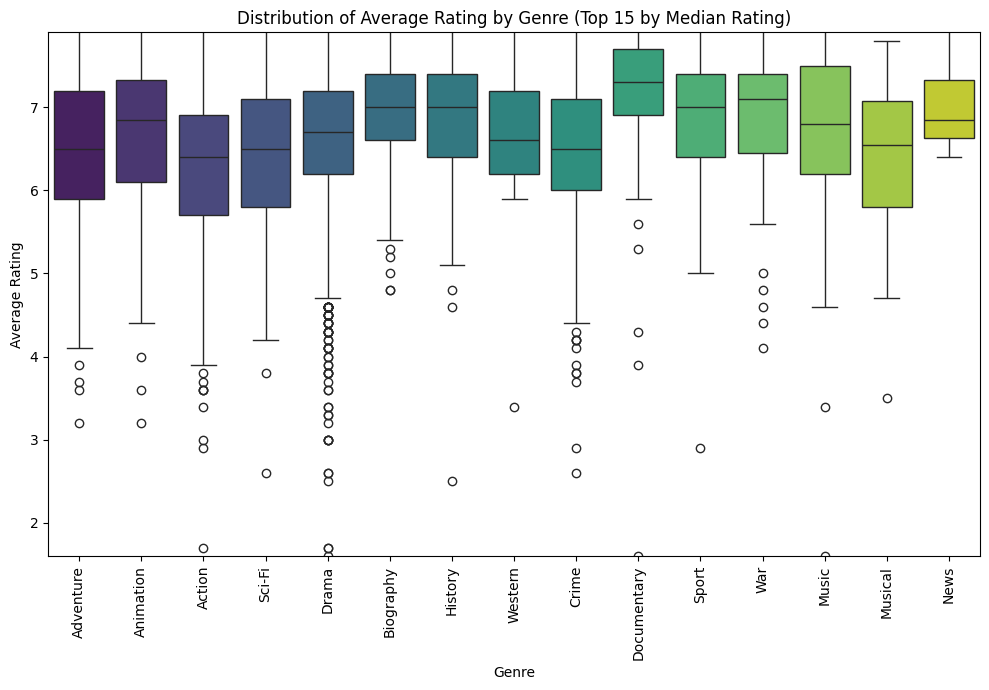

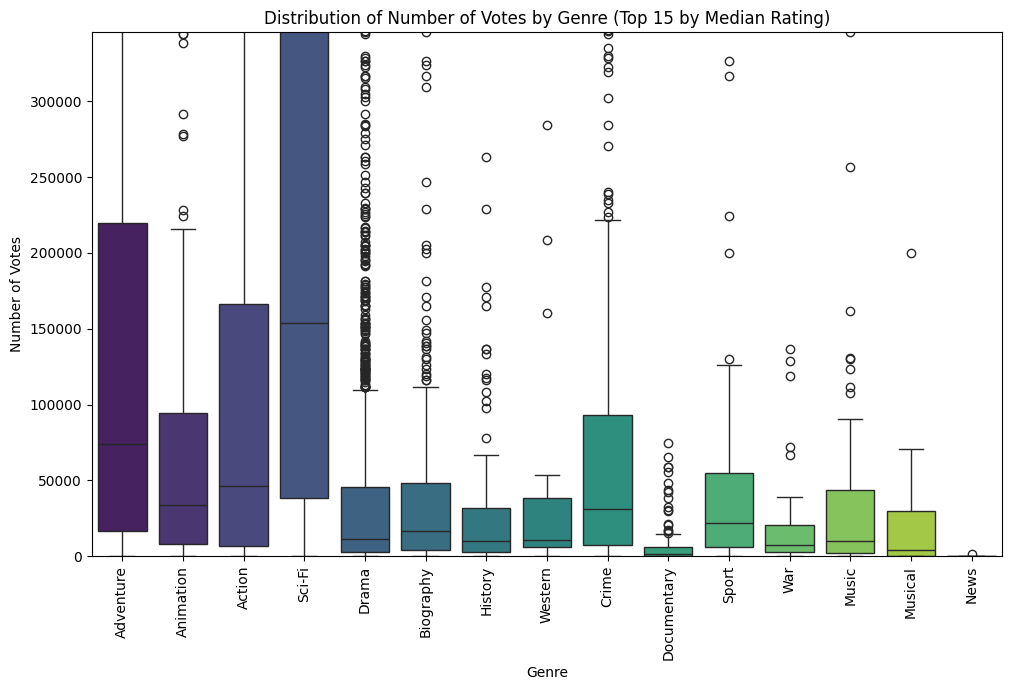

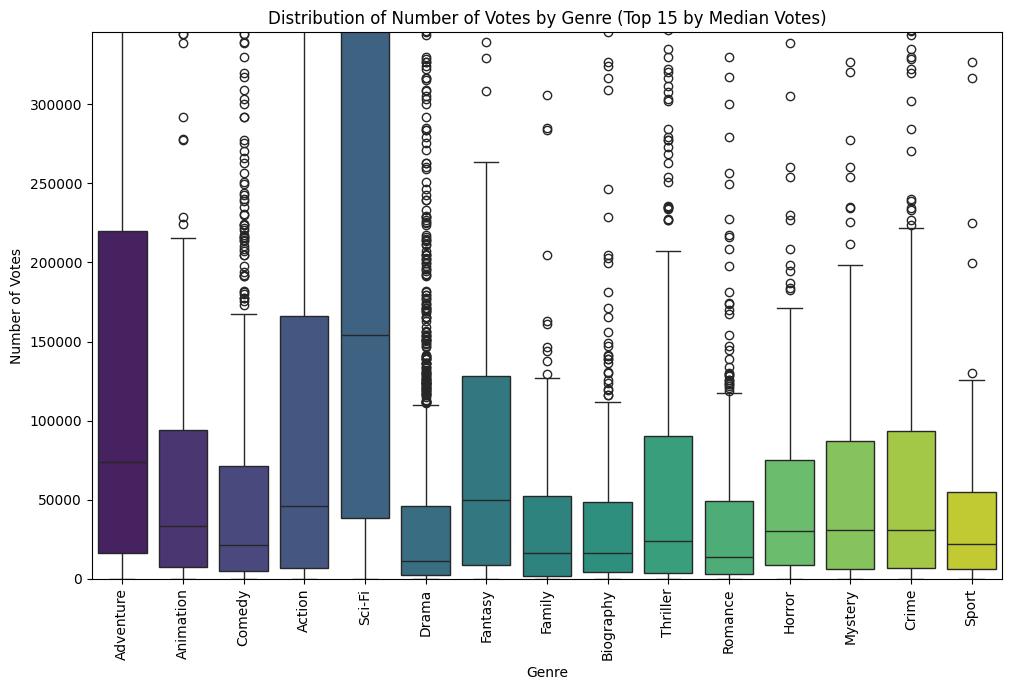

In [ ]:
# Bivariate Analysis: Genre vs. Ratings and Votes

# Group by genre and calculate median rating and number of votes
genre_ratings_votes = merged.groupby('genres')[['averagerating', 'numvotes']].median().sort_values(by='averagerating', ascending=False)

# Display the median rating and number of votes per genre, sorted by average rating
print("Median Rating and Number of Votes per Genre (sorted by Average Rating):")
display(genre_ratings_votes)

# Visualize the relationship between Genre and Average Rating using a box plot of top genres
plt.figure(figsize=(10, 7))
# Selecting top genres by average rating for visualization
top_genres_by_rating = genre_ratings_votes.head(15).index
sns.boxplot(x='genres', y='averagerating', data=merged[merged['genres'].isin(top_genres_by_rating)], palette='viridis')
plt.title('Distribution of Average Rating by Genre (Top 15 by Median Rating)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(merged['averagerating'].min(), merged['averagerating'].quantile(0.95)) # Limit y-axis to see distribution better
plt.show()

# Visualize the relationship between Genre and Number of Votes using a box plot of top genres (sorted by average rating for consistency with the first plot)
plt.figure(figsize=(10, 7))
sns.boxplot(x='genres', y='numvotes', data=merged[merged['genres'].isin(top_genres_by_rating)], palette='viridis')
plt.title('Distribution of Number of Votes by Genre (Top 15 by Median Rating)')
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, merged['numvotes'].quantile(0.95)) # Limit y-axis to see distribution better due to outliers
plt.show()

# Also visualize top genres by number of votes
genre_ratings_votes_by_votes = merged.groupby('genres')[['averagerating', 'numvotes']].median().sort_values(by='numvotes', ascending=False)
top_genres_by_votes = genre_ratings_votes_by_votes.head(15).index

plt.figure(figsize=(10, 7))
sns.boxplot(x='genres', y='numvotes', data=merged[merged['genres'].isin(top_genres_by_votes)], palette='viridis')
plt.title('Distribution of Number of Votes by Genre (Top 15 by Median Votes)')
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, merged['numvotes'].quantile(0.95)) # Limit y-axis to see distribution better due to outliers
plt.show()

These box plots help us understand how consistent the ratings and popularity are within different genres, and which genres tend to be well-received or attract a lot of attention.

For Average Rating:

Genres like Documentary, History, and Biography tend to have higher median average ratings.
Some genres show a tighter distribution of ratings (smaller boxes), suggesting more consistency in how movies within that genre are rated. Other genres have wider distributions, indicating more variability in ratings.

For Number of Votes:

Genres like Sci-Fi, Adventure, and Action tend to have a higher median number of votes, suggesting they generate more audience engagement and potentially wider reach.
Similar to ratings, the box plots show variability in vote counts within genres. Some genres consistently get a moderate number of votes, while others might have a lower median but produce outliers with extremely high vote counts (indicating highly popular films).

Overall Insights for Microsoft:

Genres that are critically acclaimed (higher ratings) are not always the same genres that attract the most votes (popularity/engagement). For example, Documentaries might have high ratings but fewer votes compared to Action or Sci-Fi films.
Understanding both ratings and votes is important. High ratings might indicate critical success or appeal to a niche audience, while high vote counts often correlate more strongly with broad popularity and, as we saw earlier with gross revenue.

Microsoft can use this information to consider whether they want to focus on genres that are critically safer bets (potentially lower risk in terms of reception) or genres that have the potential to be major hits with high audience engagement and vote counts, even if the average rating is lower or more variable.
This analysis complements the Genre vs. Gross Revenue analysis by adding the dimension of audience and critical reception, providing a more holistic view of genre performance.

Median Gross Revenue per Studio:


domestic_gross  foreign_gross  total_gross
studio                                              
HC             2700000.0    867600000.0  870300000.0
P/DW         165200000.0    405700000.0  555000000.0
BV           128000000.0    177600000.0  299300000.0
GrtIndia      20200000.0    234000000.0  254200000.0
Fox           68400000.0    101700000.0  177200000.0
...                  ...            ...          ...
AGF              15800.0       161000.0     176800.0
FOAK            107000.0        17300.0     124300.0
First             2000.0        53600.0      55600.0
ITL              41100.0        11800.0      52900.0
WOW              30800.0        18600.0      49400.0

[217 rows x 3 columns]

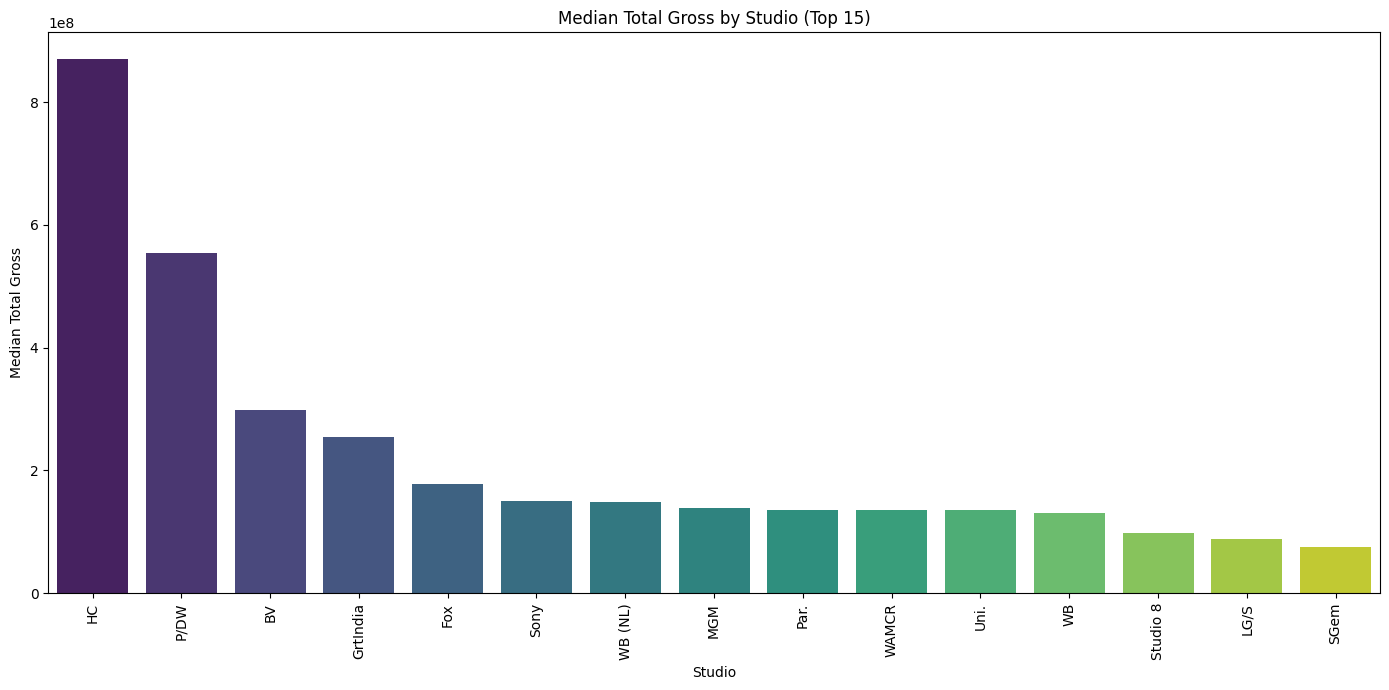

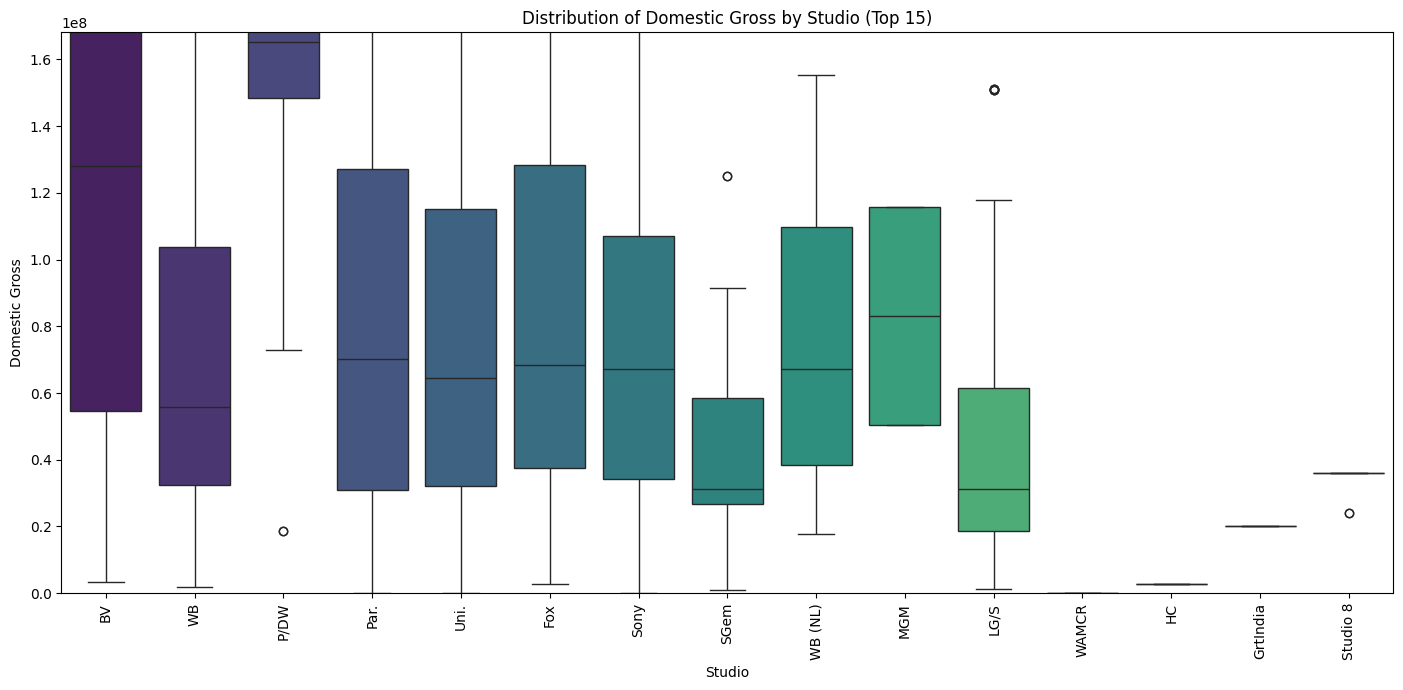

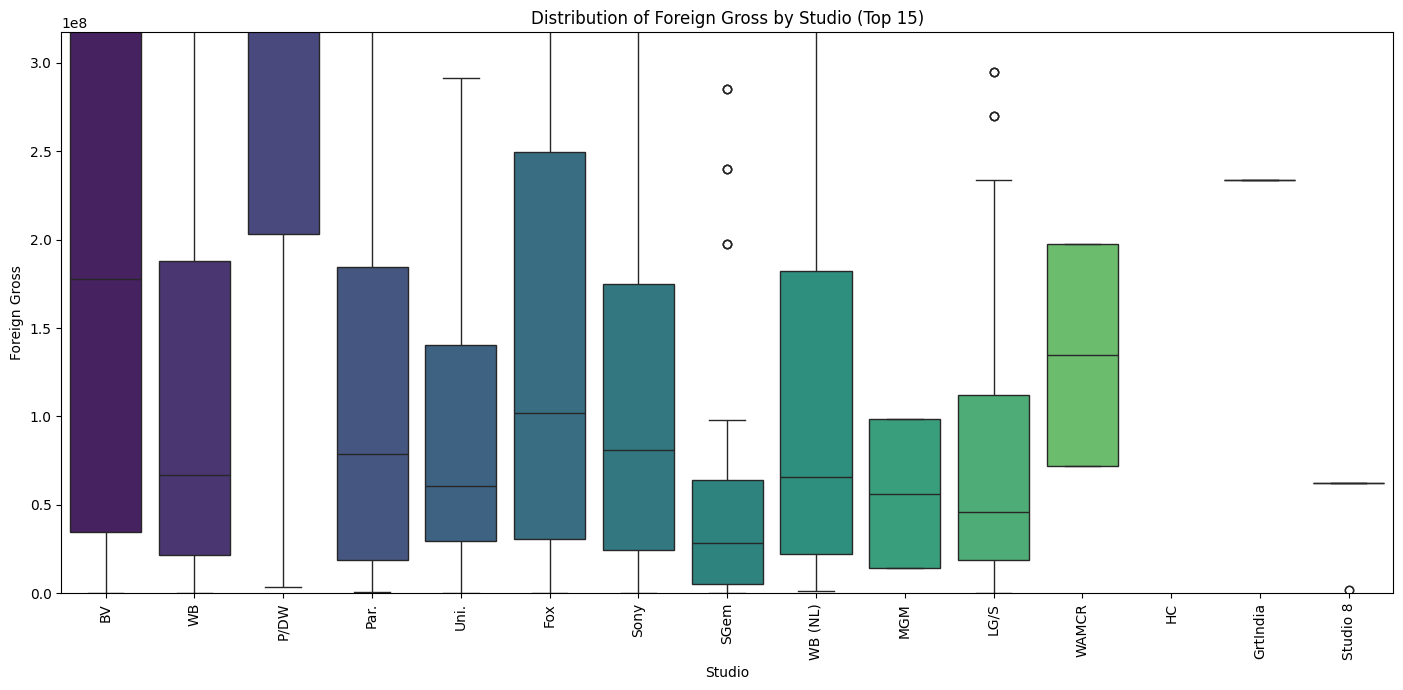

In [ ]:
# Bivariate Analysis: Studio vs. Gross Revenue

# Group by studio and calculate median gross revenues (using median due to skewed data)
studio_gross = merged.groupby('studio')[['domestic_gross', 'foreign_gross', 'total_gross']].median().sort_values(by='total_gross', ascending=False)
#the median is used because gross revenue data is often skewed by blockbusters.
# Display the median gross revenues per studio
print("Median Gross Revenue per Studio:")
display(studio_gross)

# Visualize the relationship between Studio and Total Gross using a bar plot of top studios
plt.figure(figsize=(14, 7))
top_studios_by_gross = studio_gross.head(15) # Select top 15 studios by median total gross
sns.barplot(x=top_studios_by_gross.index, y=top_studios_by_gross['total_gross'], palette='viridis')
plt.title('Median Total Gross by Studio (Top 15)')
plt.xlabel('Studio')
plt.ylabel('Median Total Gross')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize the distribution of Domestic Gross by Studio for top studios using box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='studio', y='domestic_gross', data=merged[merged['studio'].isin(top_studios_by_gross.index)], palette='viridis')
plt.title('Distribution of Domestic Gross by Studio (Top 15)')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, merged['domestic_gross'].quantile(0.95)) # Limit y-axis to see distribution better
plt.show()

# Visualize the distribution of Foreign Gross by Studio for top studios using box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='studio', y='foreign_gross', data=merged[merged['studio'].isin(top_studios_by_gross.index)], palette='viridis')
plt.title('Distribution of Foreign Gross by Studio (Top 15)')
plt.xlabel('Studio')
plt.ylabel('Foreign Gross')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0, merged['foreign_gross'].quantile(0.95)) # Limit y-axis to see distribution better
plt.show()

The bar plot clearly highlights the studios with the highest median total gross revenue. These are the studios whose typical movies tend to earn the most globally. Based on the output, studios like HC, P/DW, and BV appear to have the highest median total gross.

The box plots for domestic and foreign gross by studio reveal the variability in performance within each studio. Some studios have tight boxes, suggesting consistent performance across their films.
Other studios have wider boxes and many outliers, indicating that while their median gross might be lower, they have a higher potential for producing massive blockbusters.

The analysis shows that there's a wide range of financial performance across different studios. Some studios consistently achieve high median gross, while others might focus on a different scale or have more variable results.

Insights for Microsoft:

This analysis provides insights into the competitive landscape which helps Microsoft understand:

Which existing studios are most financially successful based on median gross.
The typical range and variability of earnings for movies produced by these top studios.
Whether certain studios excel in domestic or foreign markets, or in producing consistent earners versus high-risk/high-reward blockbusters.
This information can inform Microsoft's strategy regarding potential partnerships, talent acquisition, or the types of films they might aim to produce based on the performance patterns of established studios.

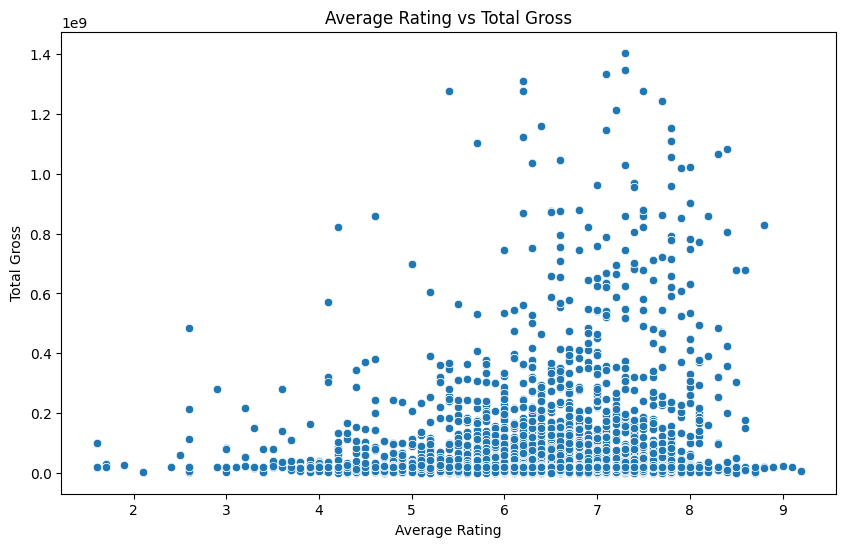

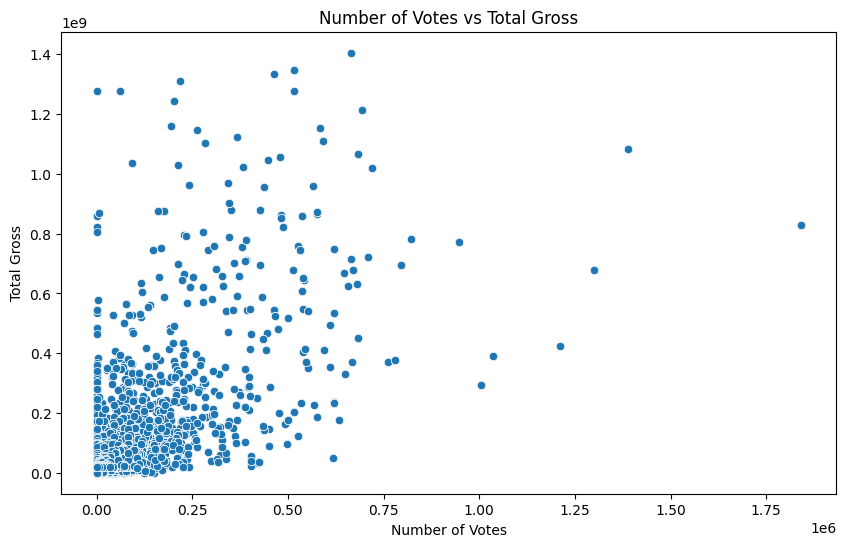

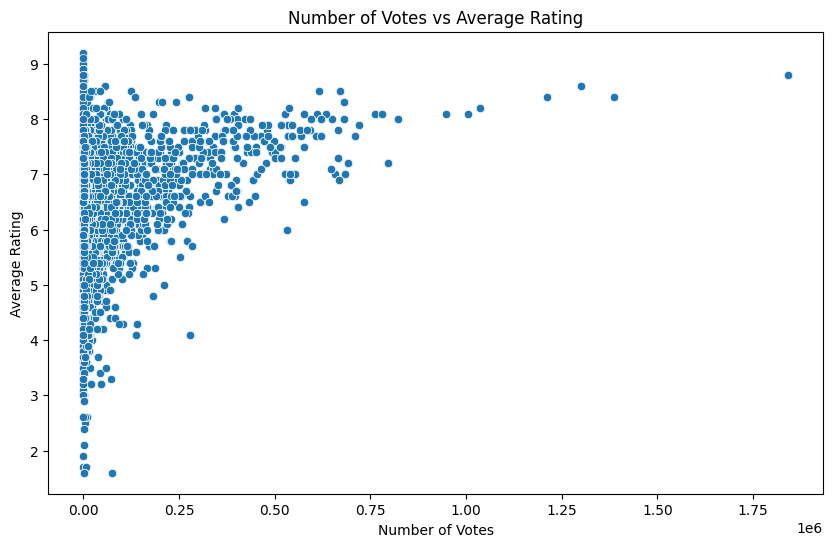

In [ ]:
# Relationship between Ratings/Votes and Gross Revenue

# Scatter plot of Average Rating vs Total Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='averagerating', y='total_gross', data=merged)
plt.title('Average Rating vs Total Gross')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross')
plt.show()

# Scatter plot of Number of Votes vs Total Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numvotes', y='total_gross', data=merged)
plt.title('Number of Votes vs Total Gross')
plt.xlabel('Number of Votes')
plt.ylabel('Total Gross')
plt.show()

# Scatter plot of Number of Votes vs Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numvotes', y='averagerating', data=merged)
plt.title('Number of Votes vs Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

The scatter plot of averagerating vs total_gross generally shows a weak positive trend. While there are some high-grossing movies with high ratings, there are also many high-grossing movies with average or even below-average ratings. Similarly, there are movies with high ratings that did not achieve very high total gross. This visually confirms the weak correlation we saw in the heatmap – a high average rating does not guarantee high box office success, and many successful movies are not necessarily the most critically acclaimed.

The scatter plot of numvotes vs total_gross shows a clearer positive trend than the rating vs. gross plot. As the number of votes increases, the total gross tends to increase. There is a visible cluster of movies with lower votes and lower gross, and as you move to higher vote counts, the potential for higher total gross generally increases. This aligns with the moderate positive correlation from the heatmap and suggests that movies that generate more audience engagement (indicated by a higher number of votes) are more likely to achieve higher box office revenues. There are also some outliers with very high total gross that also have a large number of votes.

The scatter plot of numvotes vs averagerating shows a moderate positive trend. Movies with more votes tend to have slightly higher average ratings, although there is still a significant spread in ratings, even for movies with many votes. This indicates that while popular movies might be rated slightly higher on average, high popularity doesn't guarantee a perfect rating, and movies with fewer votes can still have very high or very low ratings.

Overall Insights for Microsoft:

Audience Engagement Matters for Revenue: The number of votes appears to be a better indicator of potential total gross than the average rating. This suggests that focusing on making movies that resonate with a large audience and generate significant buzz (leading to more votes) might be a more reliable strategy for financial success than solely aiming for critical acclaim.
Ratings and Revenue are Not Strongly Coupled: High ratings are desirable but are not a strong predictor of high box office revenue on their own.
Popularity and Ratings are Moderately Related: Movies that are popular (high votes) tend to have slightly higher ratings, but it's not a strict rule.
These findings emphasize the importance of audience reach and engagement (reflected in vote counts) as a driver of box office revenue, more so than just the average rating.

# Summary and Conclusion

Based on the data and our analysis, here are the main takeaways:

Genre Performance:
Genres like Adventure, Sci-Fi, and Animation tend to have the highest median total gross revenue, indicating a strong potential for financial success. While Drama, Comedy, and Action are the most prevalent genres in the dataset, their median gross revenues are lower than the top-performing genres. The box plots reveal significant variability in gross within many genres, with some genres (like Adventure and Sci-Fi) showing a high potential for blockbuster hits (outliers).

Studio Performance: The analysis of studio performance shows that some studios consistently achieve higher median gross revenues than others. Understanding the strategies and focus of these top-performing studios could be valuable.

Audience Engagement (Votes) is a Strong Indicator of Gross Revenue: The number of votes a movie receives has a moderate positive correlation with its gross revenue. This suggests that movies that generate more public interest and discussion tend to perform better financially.
Average Rating has a Weaker Correlation with Gross Revenue: While there's a slight positive relationship, a high average rating alone does not guarantee high box office success. Critically acclaimed films are not always the highest-grossing, and many successful films have average ratings.

Runtime and Release Year: Within the timeframe of this dataset (2010-2018), runtime and the specific year of release do not appear to be strong predictors of a movie's financial success or reception.

Key Insights for Microsoft's New Movie Studio:

Focus on High-Median Gross Genres with Blockbuster Potential: Consider prioritizing genres like Adventure, Sci-Fi, and Animation, which show high median total gross and a tendency to produce blockbuster hits. While these might be competitive spaces, the data suggests they offer strong financial upside.

Prioritize Audience Engagement: Given the stronger correlation between the number of votes and gross revenue compared to average rating, focus on developing films that are likely to resonate with a broad audience and generate buzz and popularity.

Learn from Top Studios: Analyze the types of films, genres, and scales of production of consistently high-performing studios in the top tiers. This could provide insights into successful strategies and market positioning.

Ratings are Important, but Not the Sole Determinant of Financial Success: While aiming for quality and positive reviews is valuable for reputation and potentially attracting some audience segments, do not solely rely on achieving high critical ratings as a guarantee of box office success.


These conclusions provide a data-driven starting point for Microsoft to consider when deciding what types of films to produce for their new movie studio.

## Follow up questions

### a). Did we have the right data?

Yes we had the right data.
The datasets provided key metrics like domestic gross, foreign gross, average rating, and number of votes, which are directly relevant to evaluating movie performance and popularity.
Additionallay, we had information on genre, studio, year of release, and runtime, allowing us to explore how these attributes relate to performance.

### b). Do we need other data to answer our question?

We would probably need data from more recent years to provide a more current perspective because market trends and audience preference tend to change over time. (our data only covers 2010-2018)

Additionally, we would need to analyse the budget data to show profitability of different movies across different genres.



Let us do an analysis of the profit by budgets analysis by loading and merging the budgets data to the merged data

(we had tried this but it yielded a lot of missing values and hence, we decided to do an analysis of this separately so as not to skew our initial findings)

In [ ]:
# Loading the budgets Dataset from the source i.e. csv
budgets = pd.read_csv('/content/tn.movie_budgets.csv.gz')
budgets.head()


id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [ ]:
budgets_copy = budgets.copy()

# Clean the budget columns in budgets_copy
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    budgets_copy[col] = budgets_copy[col].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    budgets_copy[col] = pd.to_numeric(budgets_copy[col])

# Rename the 'movie' column to 'primary_title' for merging
budgets_copy.rename(columns={'movie': 'primary_title'}, inplace=True)

#merge the budgets to the merged dataframe
merged_budgets = pd.merge(merged, budgets_copy, on='primary_title', how='left')
merged_budgets.head()

tconst primary_title studio  domestic_gross_x  foreign_gross  year  \
0  tt0435761   Toy Story 3     BV       415000000.0    652000000.0  2010   
1  tt0435761   Toy Story 3     BV       415000000.0    652000000.0  2010   
2  tt0435761   Toy Story 3     BV       415000000.0    652000000.0  2010   
3  tt1375666     Inception     WB       292600000.0    535700000.0  2010   
4  tt1375666     Inception     WB       292600000.0    535700000.0  2010   

  original_title  start_year  runtime_minutes     genres  averagerating  \
0    Toy Story 3        2010            103.0  Adventure            8.3   
1    Toy Story 3        2010            103.0  Animation            8.3   
2    Toy Story 3        2010            103.0     Comedy            8.3   
3      Inception        2010            148.0     Action            8.8   
4      Inception        2010            148.0  Adventure            8.8   

   numvotes   total_gross    id  release_date  production_budget  \
0    682218  1.067000e+09  47.0  Jun 18, 2010        200000000.0   
1    682218  1.067000e+09  47.0  Jun 18, 2010        200000000.0   
2    682218  1.067000e+09  47.0  Jun 18, 2010        200000000.0   
3   1841066  8.283000e+08  38.0  Jul 16, 2010        160000000.0   
4   1841066  8.283000e+08  38.0  Jul 16, 2010        160000000.0   

   domestic_gross_y  worldwide_gross  
0       415004880.0     1.068880e+09  
1       415004880.0     1.068880e+09  
2       415004880.0     1.068880e+09  
3       292576195.0     8.355246e+08  
4       292576195.0     8.355246e+08

In [ ]:
#check for null values
merged_budgets.isnull().sum()

tconst                  0
primary_title           0
studio                  0
domestic_gross_x        0
foreign_gross           0
year                    0
original_title          0
start_year              0
runtime_minutes         0
genres                  0
averagerating           0
numvotes                0
total_gross             0
id                   3575
release_date         3575
production_budget    3575
domestic_gross_y     3575
worldwide_gross      3575
dtype: int64

Merging the budgets dataframe gives us a lot of null vallues, this is why we decided to exclude it from our main analysis,
However, we can use it to calculate the profit and analyse the profit by genre for some insights,

In [ ]:
# Calculate Profit
# Ensure 'worldwide_gross' and 'production_budget' are numeric and not missing (or handle missing values)
# We already handled missing values and converted to numeric when merging budget data

merged_budgets['profit'] = merged_budgets['worldwide_gross'] - merged_budgets['production_budget']
print("DataFrame with 'profit' column added:")
display(merged_budgets.head())

DataFrame with 'profit' column added:


tconst primary_title studio  domestic_gross_x  foreign_gross  year  \
0  tt0435761   Toy Story 3     BV       415000000.0    652000000.0  2010   
1  tt0435761   Toy Story 3     BV       415000000.0    652000000.0  2010   
2  tt0435761   Toy Story 3     BV       415000000.0    652000000.0  2010   
3  tt1375666     Inception     WB       292600000.0    535700000.0  2010   
4  tt1375666     Inception     WB       292600000.0    535700000.0  2010   

  original_title  start_year  runtime_minutes     genres  averagerating  \
0    Toy Story 3        2010            103.0  Adventure            8.3   
1    Toy Story 3        2010            103.0  Animation            8.3   
2    Toy Story 3        2010            103.0     Comedy            8.3   
3      Inception        2010            148.0     Action            8.8   
4      Inception        2010            148.0  Adventure            8.8   

   numvotes   total_gross    id  release_date  production_budget  \
0    682218  1.067000e+09  47.0  Jun 18, 2010        200000000.0   
1    682218  1.067000e+09  47.0  Jun 18, 2010        200000000.0   
2    682218  1.067000e+09  47.0  Jun 18, 2010        200000000.0   
3   1841066  8.283000e+08  38.0  Jul 16, 2010        160000000.0   
4   1841066  8.283000e+08  38.0  Jul 16, 2010        160000000.0   

   domestic_gross_y  worldwide_gross       profit  
0       415004880.0     1.068880e+09  868879522.0  
1       415004880.0     1.068880e+09  868879522.0  
2       415004880.0     1.068880e+09  868879522.0  
3       292576195.0     8.355246e+08  675524642.0  
4       292576195.0     8.355246e+08  675524642.0

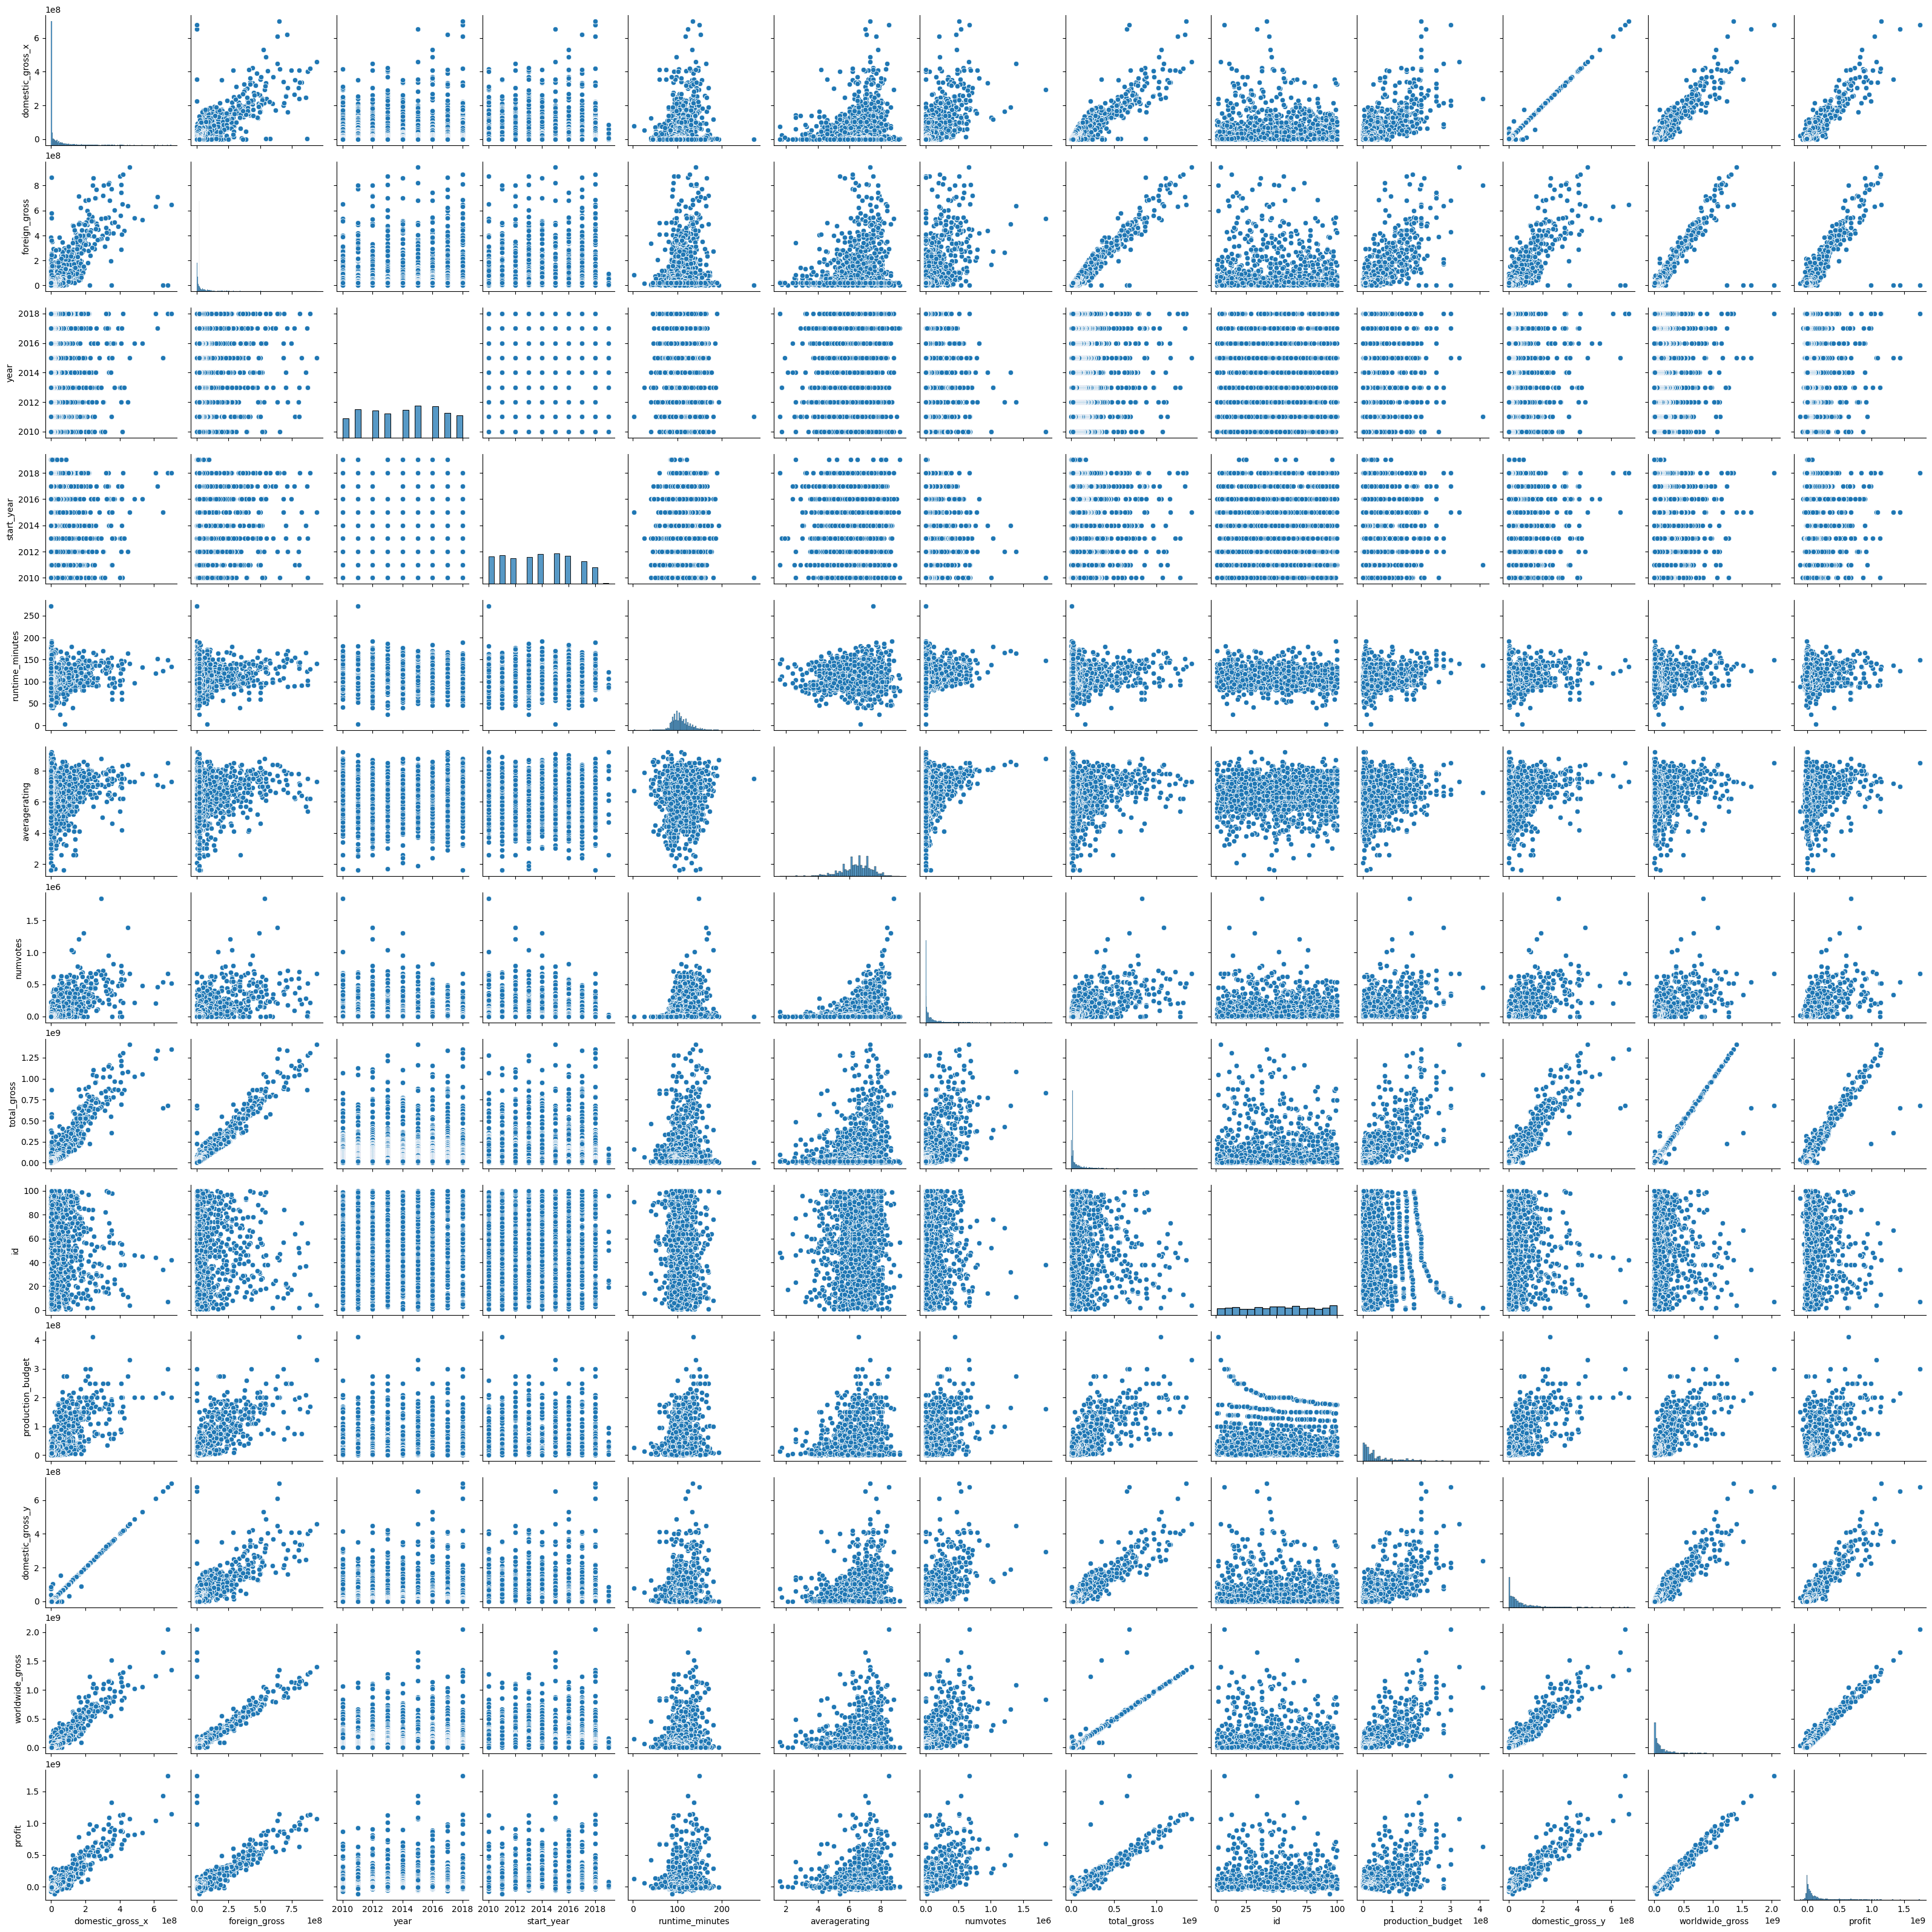

In [ ]:
# pairplot in the merged_budgets dataframe
sns.pairplot(merged_budgets)
plt.show()

From this, we can see a strong positive correlations between production_budget and the gross revenue columns (domestic_gross, foreign_gross, total_gross, and worldwide_gross). This is expected, as movies with higher budgets often aim for and achieve higher box office returns.
Strong positive correlations between worldwide_gross and the other gross revenue columns (domestic_gross, foreign_gross, total_gross). This is also expected as worldwide_gross is another measure of total revenue.Correlations between production_budget and numvotes or averagerating: there is some correlation here, as higher budget films could potentially attract more attention (votes) or higher production values might influence ratings, although this relationship might not be as strong as with gross revenues.

Median Profit per Genre:


genres
Animation      220990599.5
Adventure      140361578.0
Sci-Fi         128564919.0
Action          68938278.5
Musical         46801803.5
Family          46396782.5
Comedy          42160680.0
Unknown         41134059.0
Fantasy         40878040.0
Mystery         39115496.0
Horror          36869953.5
Thriller        36665547.0
Sport           21833036.5
Biography       21734733.0
History         21734733.0
Music           21321843.0
Documentary     20700439.0
Crime           19535736.0
Romance         19247816.0
Drama           16287808.0
News            12757826.5
War              -898947.0
Western         -5532561.0
Name: profit, dtype: float64

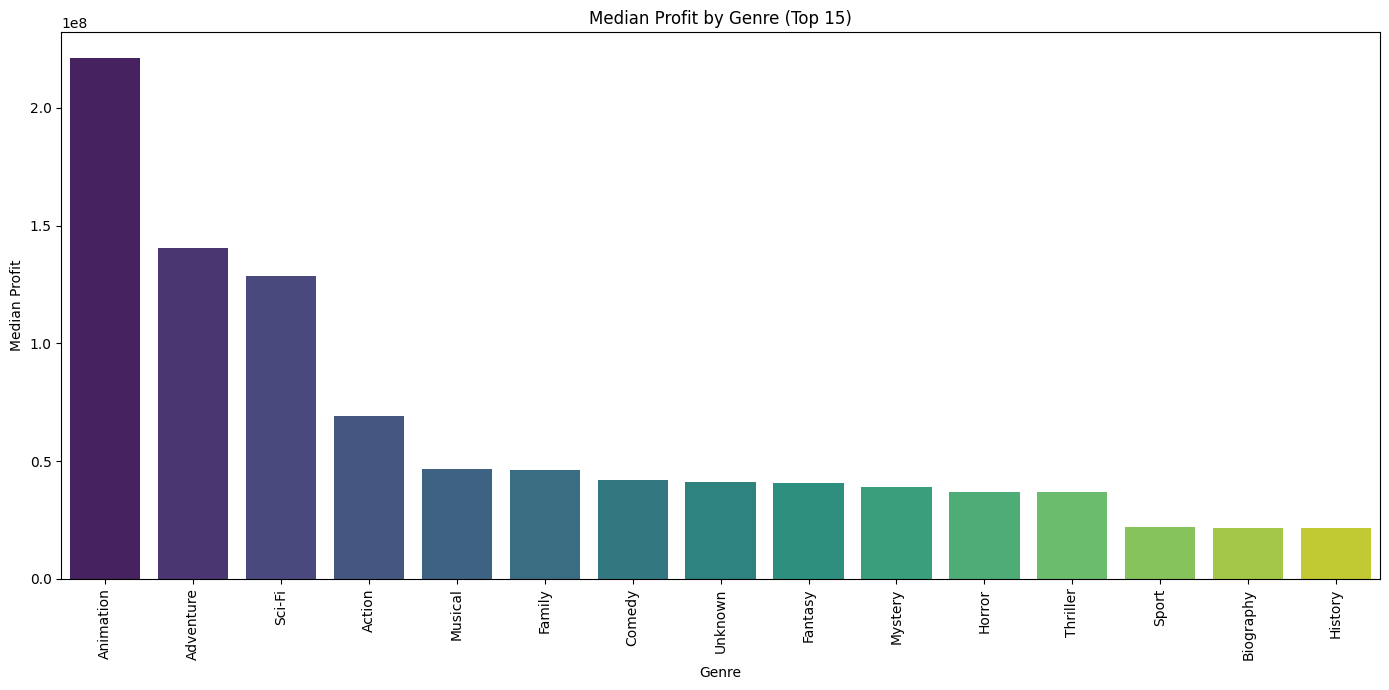

In [ ]:
# Analyze Profitability by Genre
genre_profit = merged_budgets.groupby('genres')['profit'].median().sort_values(ascending=False)

print("Median Profit per Genre:")
display(genre_profit)

# Visualize Median Profit by Genre (Top 15)
plt.figure(figsize=(14, 7))
top_genres_by_profit = genre_profit.head(15)
sns.barplot(x=top_genres_by_profit.index, y=top_genres_by_profit.values, palette='viridis')
plt.title('Median Profit by Genre (Top 15)')
plt.xlabel('Genre')
plt.ylabel('Median Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The bar plot clearly shows which genres have the highest median profit. These are the genres where the typical movie generates the most profit after accounting for the production budget. Based on the output, Animation, Adventure, and Sci-Fi appear to be among the genres with the highest median profit.

Comparison with Gross Revenue: It's interesting to compare this list of top profitable genres with the list of top genres by gross revenue . While there is overlap (Adventure and Sci-Fi appear in both), Animation is notably very high in terms of median profit, potentially indicating that animated films, on average, have a good return on investment relative to their budget, even if their raw gross might not always be the absolute highest.

Understanding Negative Profit:The table also shows genres with negative median profit (e.g., War, Western). This suggests that, on average, movies in these genres in this dataset did not recoup their production budget based on worldwide gross alone.

This analysis provides a more financially-focused view than just looking at gross revenue. For Microsoft, focusing on genres with high median profit (like Animation, Adventure, and Sci-Fi) could be a more direct path to financial success, as it considers the cost of production. It also highlights genres that might be riskier in terms of profitability based on historical data in this dataset.